# Introduction


<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fa6f42bf10f698f6d5fa3cf2ec3731941%2Fshutterstock_99365936Optimized.jpg?generation=1603875345551681&alt=media"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
*GOLDEN DELICIOUS*  
</div>

### History
***
An American apple, the Golden Delicious had its beginning as a chance seedling on the West Virginia farm of Anderson H. Mullins in 1890 in Clay County and was originally named Mullins Yellow Seedling. Later in 1916, this apple was renamed the Golden Delicious when Paul Stark of Stark Brothers Nursery bit into it in 1914. Mullins sold the rights to the Golden Delicious apple to Stark Brothers Nursery and the rest is history. Since 1973, Clay County celebrates its famous apple with the annual Clay County Golden Delicious Festival.

***
### Vision
Apples are one of the most popular and widely produced fruits. Apples are produced in temperate regions throughout the world, in both the Northern and Southern Hemispheres. Although apple production is seasonal, they are available on international markets throughout the year due to global export supplies.
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?
***
### Mission
Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.
***

### Import packages and modules
The first thing to do before data collection can be done is to import all packages that will be used in this notebook

In [65]:
# Regression models
# Regression models
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import metrics

# Visualisations
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import math
import pickle
import pandas as pd
import numpy as np



# Step 1: Data Collection

The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs. The Explore team separated the data into two different test and train sets as .csv files and removed the avg_price_per_kg column in order to test our best model's predictive accuracy.

The first thing we do is to define our test and train data from the csv files

In [30]:
#Define the test and train variable used throughout this notebook
train = pd.read_csv('train_set.csv') 
test = pd.read_csv('test_set.csv')


# As Jupyter notebooks only display the first and last 5 rows for last datasets, 
# we change the number of rows and columns displayed to a maximum 500 rows
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

For this challenge we are only supposed to determine the average price per kg of the commodity APPLE GOLDEN DELICIOUS, so we will only extract the rows which have the APPLE GOLDEN DELICIOUS commodity

In [31]:
#Removing Commodities column
train = train.loc[(train['Commodities'] == 'APPLE GOLDEN DELICIOUS')]

#As the Commodities column is redundant and all rows are identical, we remove this column from both test and train datasets
train = train.drop(['Commodities'], axis = 1)
test = test.drop(['Commodities'], axis = 1)

# Step 2: Data Cleaning

Before heading on to exploratory data analysis (EDA), it is always essential to first clean the data to ensure accurate insights and good predictive ability. We do this by checking for missing values, null values, infinity values and duplicate entries

In [4]:
#Here we check if our train dataframe(df) contains any null values
train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

We can see that there are no null values in our train df, but the same has to be done for the test df

In [5]:
#Here we check if our test dataframe(df) contains any null values
test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

There are also no null values in our test df

In [6]:
#Here we check to see if there are any duplicated values in our train dataset
train[train.duplicated()]

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg


In [7]:
#Here we check to see if there are any duplicated values in our test dataset
test[test.duplicated()]

,Index,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand


We can conclude that our data is already clean and has no double entries or null values, which means we can start with EDA

# Step 3: Exploratory Data Analysis

EDA is arguably the most important step in the datascience process. By analysing our data for outliers and relationships or trends between features, we get a better understanding of our data and which features can be used to predict our target variable. This section is made up of visulations and descriptions of data trends, and statistical analyses to find the features that affect the avgerage price per kilogram of Golden Apples Delcious, and the features that have an insignificant effect and can be removed

## Basic Analysis

The first steps in EDA consist of basic analysis to just get an overview of the data and which possible features are available to us

In [8]:
#Overview of our training dataset
train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [9]:
#Overview of our test dataset
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [10]:
#List of features that can be used to predict the average price per kg
featureslist = train.columns.values.tolist()
FeaturesDF = pd.DataFrame(featureslist,columns=['Features'])
FeaturesDF

,Features
0,Province
1,Container
2,Size_Grade
3,Weight_Kg
4,Date
5,Low_Price
6,High_Price
7,Sales_Total
8,Total_Qty_Sold
9,Total_Kg_Sold


The list shows that we have 11 features to choose from.<br>
The features include:<br>
	Province <br>
	Container<br>
	Size_Grade<br>
	Weight_Kg<br>
	Date<br>
	Low_Price<br>
	High_Price<br>
	Sales_Total<br>
    Total_Qty_Sold<br>
	Total_Kg_Sold<br>
	Stock_On_Hand<br>


In [11]:
#Shape of the train and test dfs
print(train.shape)
print(test.shape)

(1952, 12)
(685, 12)


We see that our train dataframe has 1952 entries and 12 columns, to be used as features, excluding the avgerage price per kg which will be the predictor variable. Our test df has 685 entries and 12 rows as well, but we know that from looking at previous summaries above, the test df has a column named 'Index', and is why the test and train dfs have the same number of columns

In [12]:
#Summary of null counts and column types in our train df
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Date              1952 non-null   object 
 5   Low_Price         1952 non-null   float64
 6   High_Price        1952 non-null   float64
 7   Sales_Total       1952 non-null   float64
 8   Total_Qty_Sold    1952 non-null   int64  
 9   Total_Kg_Sold     1952 non-null   float64
 10  Stock_On_Hand     1952 non-null   int64  
 11  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 198.2+ KB


In [13]:
#Summary of null counts and column types in our test df
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Date            685 non-null    object 
 6   Low_Price       685 non-null    float64
 7   High_Price      685 non-null    float64
 8   Sales_Total     685 non-null    float64
 9   Total_Qty_Sold  685 non-null    int64  
 10  Total_Kg_Sold   685 non-null    float64
 11  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 64.3+ KB


It seems that the 'Date' columns in both the test and train dfs are not datetime objects, we will just change these to a datetime object 

In [5]:
train['Date'] = pd.DatetimeIndex(train['Date'])
test['Date'] = pd.DatetimeIndex(test['Date'])

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Date              1952 non-null   datetime64[ns]
 5   Low_Price         1952 non-null   float64       
 6   High_Price        1952 non-null   float64       
 7   Sales_Total       1952 non-null   float64       
 8   Total_Qty_Sold    1952 non-null   int64         
 9   Total_Kg_Sold     1952 non-null   float64       
 10  Stock_On_Hand     1952 non-null   int64         
 11  avg_price_per_kg  1952 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 198.2+ KB


In [16]:
# Boitumelo
train.nunique()#check for the unique values

Province               7
Container             11
Size_Grade            10
Weight_Kg              9
Date                 147
Low_Price             94
High_Price            88
Sales_Total         1324
Total_Qty_Sold       505
Total_Kg_Sold        850
Stock_On_Hand        735
avg_price_per_kg     601
dtype: int64

We also need to look at if our columns are numeric or categorical

In [49]:
numeric_cols = list(train.select_dtypes(include=np.number))
categorical_cols = list(train.select_dtypes(include=object))
print('numeric_cols: ', numeric_cols)
print('categorical_cols: ',categorical_cols)

numeric_cols:  ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg']
categorical_cols:  ['Province', 'Container', 'Size_Grade']


## Graphical and non-graphical analysis


### Univariate Analysis: Non-Graphical

We first start by just looking as some simple descriptive statistics for each variable in our df

In [18]:
# Mean, standard deviation and a five number summary of each numerical feature.
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


To look at how symmetrical our data is around the mean, or the normal distribution we look at the skewness of the data

In [19]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

Normally a skew between -0.05 and 0.05 is considered fairly symmetrical, avg_price_per_kg is close to that and seems to not be too unsymmetrical. It is the only fairly symmerical feature, while the rest of the data has a large positive skew 

We now investigate the kurtosis, or the measure of outliers

In [20]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

We can see that all features, except our dependent variable, have a kurtosis of greater than 3 indicating large numbers of outliers and a higher and sharper peak. Let's now take a more in depth view of the features by visualising the data

## Univariate Analysis: Graphical

The first thing we'll look at is the distribution of our dependent variable, 'avg_price_per_kg'

In [44]:
sns.set(font_scale=2) 
sns.set_style("whitegrid", {'axes.grid' : False})

Text(0.5, 1.0, 'Distribution of avg_price_per_kg')

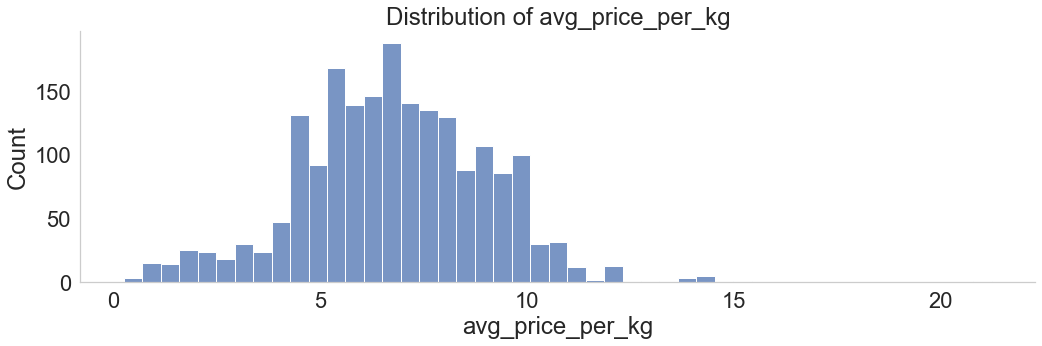

In [46]:
sns.displot(train["avg_price_per_kg"], height = 5, aspect = 3)
sns.color_palette("crest", as_cmap=True)
ax.grid(False)
plt.title('Distribution of avg_price_per_kg')

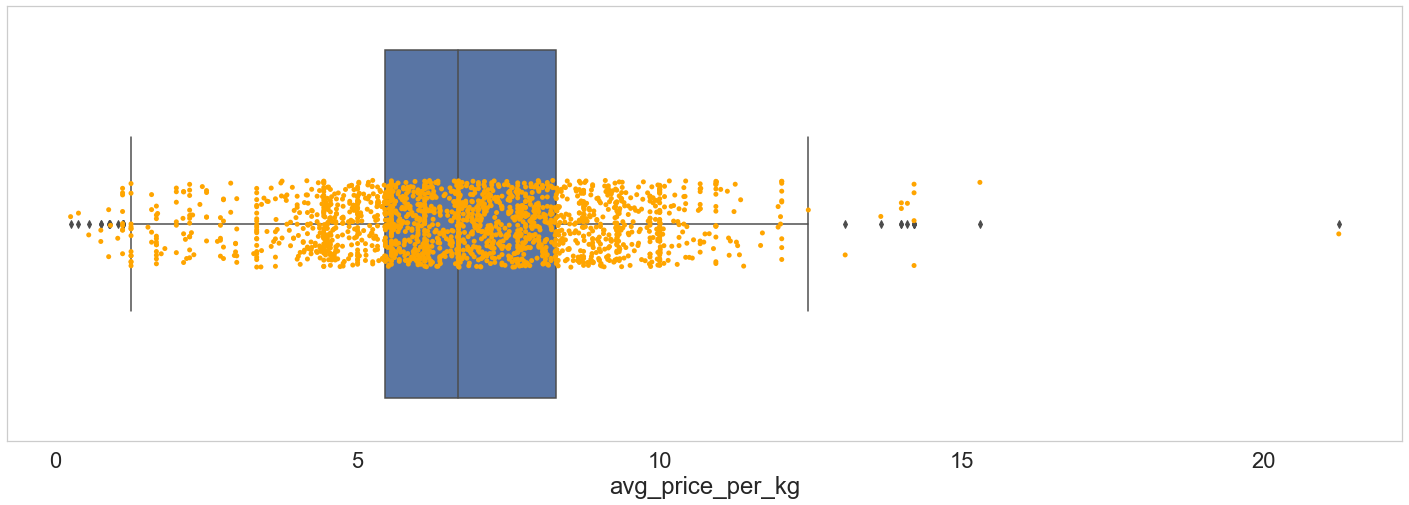

In [47]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(25, 8)


ax = sns.boxplot(data = train, x = "avg_price_per_kg")
ax = sns.stripplot(data = train, x = "avg_price_per_kg", color='orange')

We can see that this is in line with the 0.08 skewness as we see data that is spread almost symetrically with some outliers above an avg_price_per_kg of greater that 15. We can see that most of our avg price per kg is spread between 0 and 12 with the majority of prices in between about R5 to R8

Next we will look at all the independent variables

<AxesSubplot:xlabel='Stock_On_Hand'>

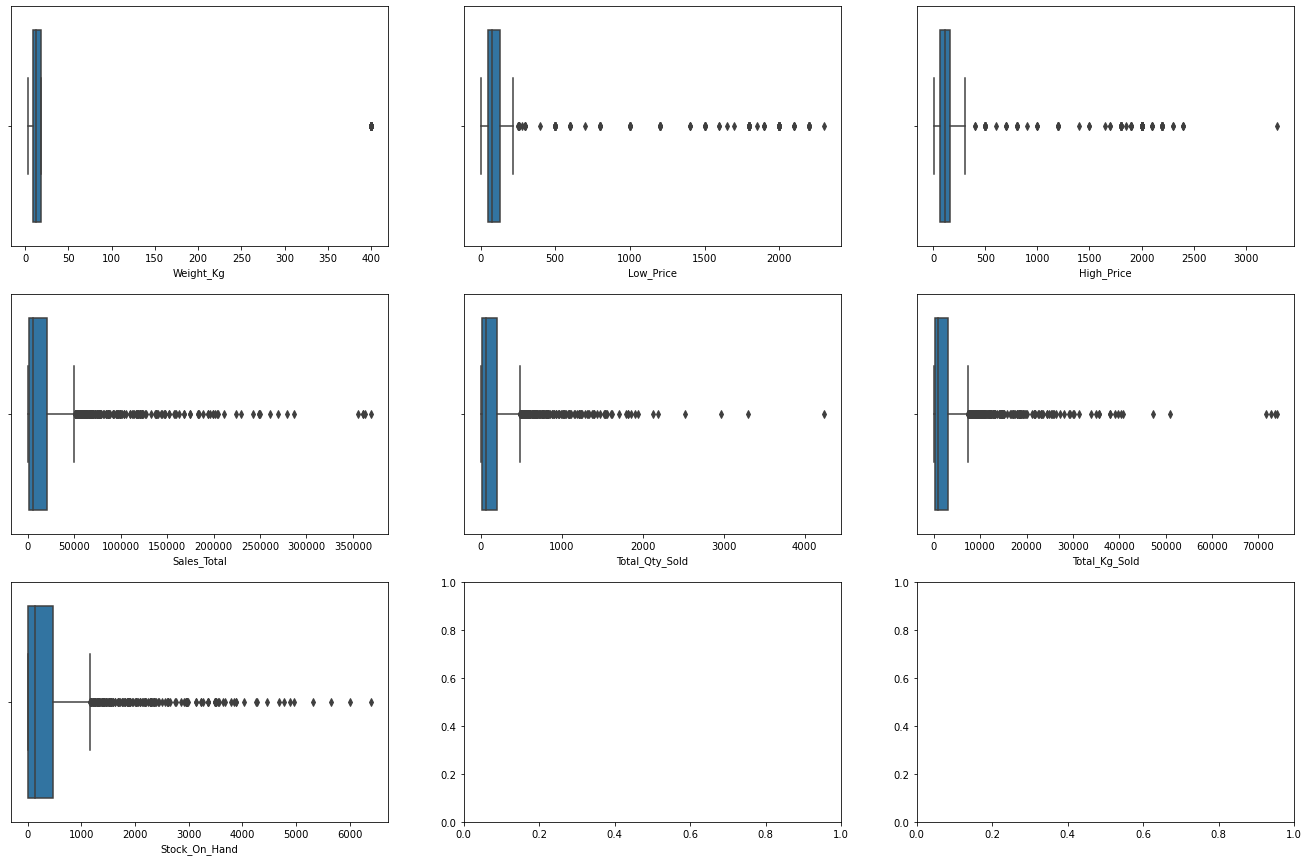

In [23]:
#Boitumelo - box plots for all numeric features
fig, ax = plt.subplots(3,3, figsize=(23,15))
sns.boxplot(ax=ax[0,0], data=train, x='Weight_Kg')
sns.boxplot(ax=ax[0,1], data=train, x='Low_Price')
sns.boxplot(ax=ax[0,2], data=train, x='High_Price')
sns.boxplot(ax=ax[1,0], data=train, x='Sales_Total')
sns.boxplot(ax=ax[1,1], data=train, x='Total_Qty_Sold')
sns.boxplot(ax=ax[1,2], data=train, x='Total_Kg_Sold')
sns.boxplot(ax=ax[2,0], data=train, x='Stock_On_Hand')

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

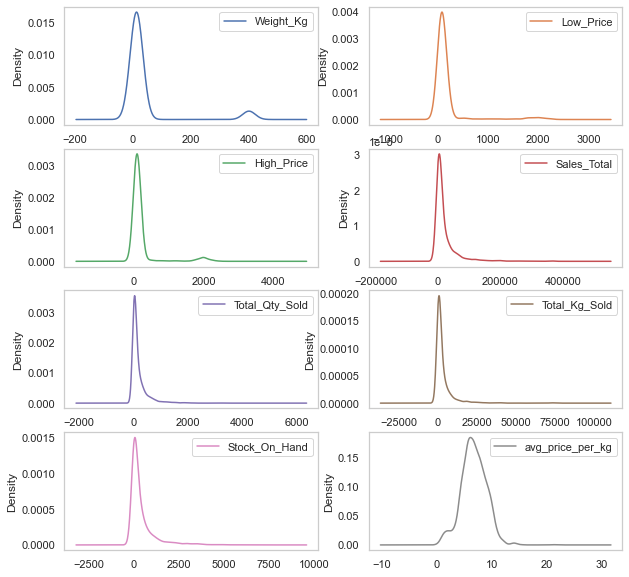

In [54]:
#density plots for all numeric columns
sns.set(font_scale=1) 
sns.set_style("whitegrid", {'axes.grid' : False})
train[numeric_cols].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(10, 10))

By looking at the plots above we see that all features have a high distribution or density around very low values close to 0, but that they all taper off in a positive direction that explains their high positive skew and kurotsis. 

The main conclusions from these graphs jhf
Weight_Kg has a significant density of samples around 400 kg
High_Price and Low_Price has a significant density of samples around R2000


Text(0.5, 1.0, 'Container Counts')

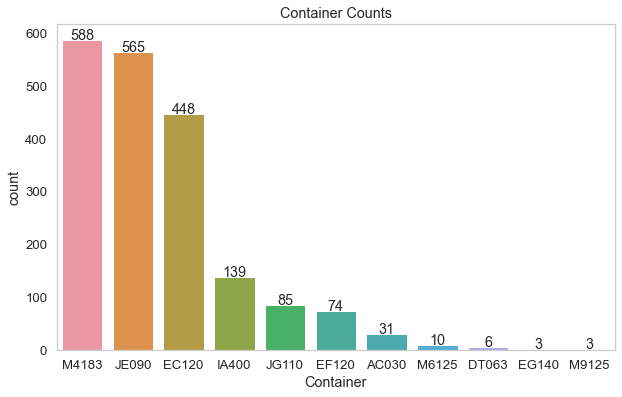

In [77]:
sns.set(font_scale=1.2) 
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax1 = plt.subplots(figsize=(10,6))
graph = sns.countplot(ax=ax1,x='Container', 
                      data=train, 
                      order=train['Container'].value_counts().sort_values(ascending = False).index)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.title('Container Counts')

Text(0.5, 1.0, 'Province Counts')

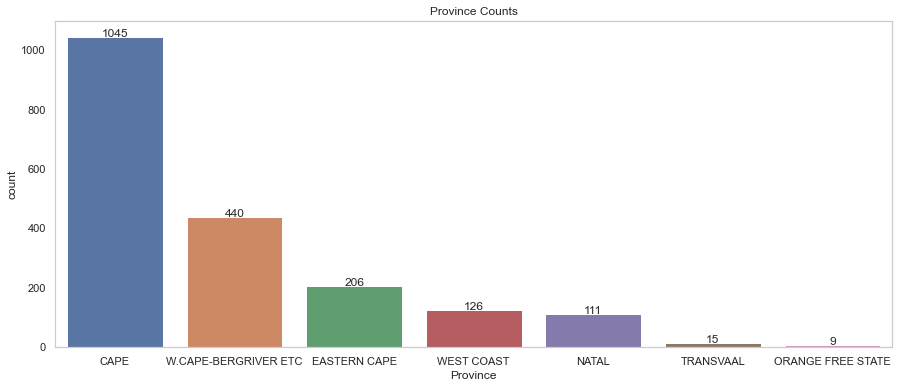

In [84]:
sns.set(font_scale=1) 
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax1 = plt.subplots(figsize=(15,6))
graph = sns.countplot(ax=ax1,x='Province', 
                      data=train, 
                      order=train['Province'].value_counts().sort_values(ascending = False).index)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.title('Province Counts')

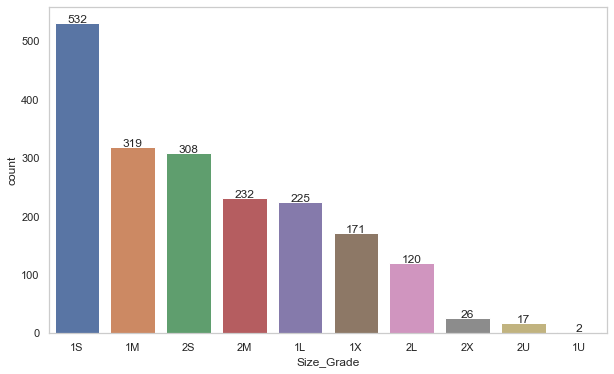

In [101]:
fig, ax1 = plt.subplots(figsize=(10,6))
graph = sns.countplot(ax=ax1,x='Size_Grade', 
                      data=train, order=train['Size_Grade'].value_counts().sort_values(ascending = False).index)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

To decide if we will use a linear model we must first check to see if there is linearity in our data. If enough features have linearity we can define a linear function with predictor variables that each change a certain amount to affect the dependent variable. If our data is not linear we should fit a non-linear model.

To check for linearity we will first look at scatterplots of each variable against the dependent variable, and then look at the same scatterplots but with a regression line


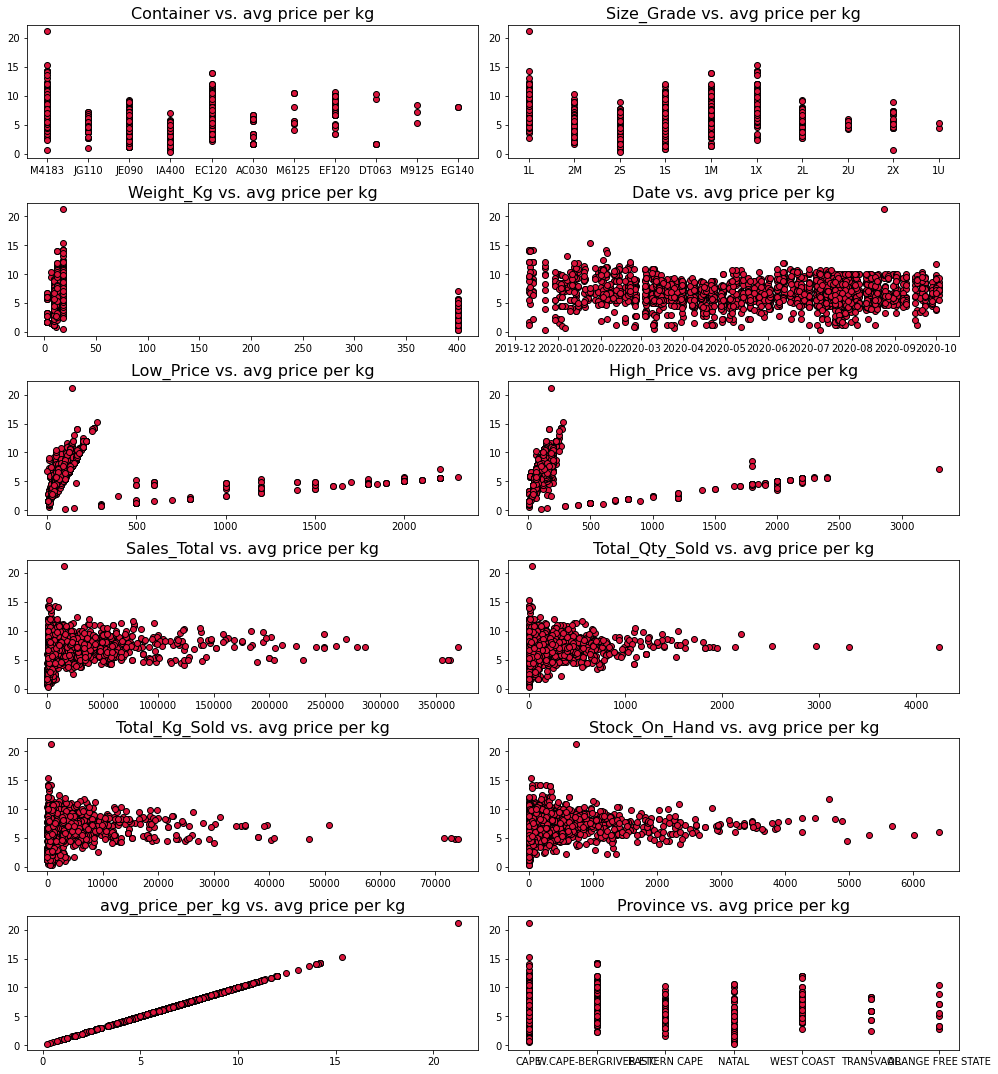

In [34]:
fig, axs = plt.subplots(6,2,figsize=(14,15))
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()


for index, column in enumerate(train.columns):
    axs[index-1].set_title("{} vs. avg price per kg".format(column),fontsize=16)
    axs[index-1].scatter(x=train[column],y=train['avg_price_per_kg'],color='crimson',edgecolor='k')

fig.tight_layout(pad=1)

We can see that there are some obvious trends going on in the High and Low price columns. The trends could be caused by another variable so we will investigate the cause of these trends later during multivariate features.

<AxesSubplot:xlabel='Weight_Kg', ylabel='avg_price_per_kg'>

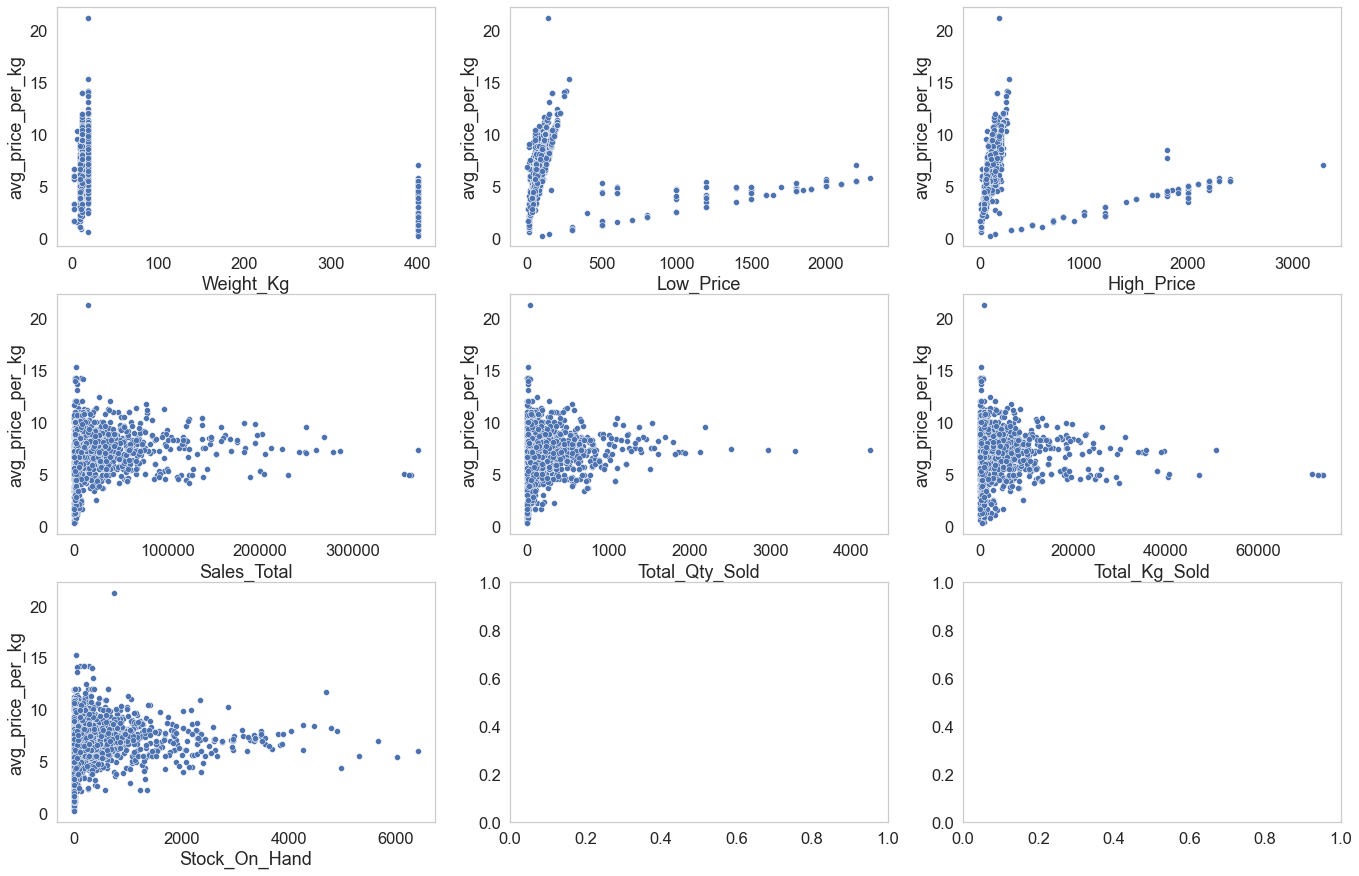

In [125]:
fig, ax = plt.subplots(3,3, figsize=(23,15))
sns.set(font_scale=1.5) 
sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(ax=ax[0,1], data=train, x='Low_Price',  y='avg_price_per_kg')
sns.scatterplot(ax=ax[0,2], data=train, x='High_Price',  y='avg_price_per_kg')
sns.scatterplot(ax=ax[1,0], data=train, x='Sales_Total',  y='avg_price_per_kg')
sns.scatterplot(ax=ax[1,1], data=train, x='Total_Qty_Sold',  y='avg_price_per_kg')
sns.scatterplot(ax=ax[1,2], data=train, x='Total_Kg_Sold',  y='avg_price_per_kg')
sns.scatterplot(ax=ax[2,0], data=train, x='Stock_On_Hand',  y='avg_price_per_kg')
sns.scatterplot(ax=ax[0,0], data=train, x='Weight_Kg',  y='avg_price_per_kg')

<AxesSubplot:xlabel='Weight_Kg', ylabel='avg_price_per_kg'>

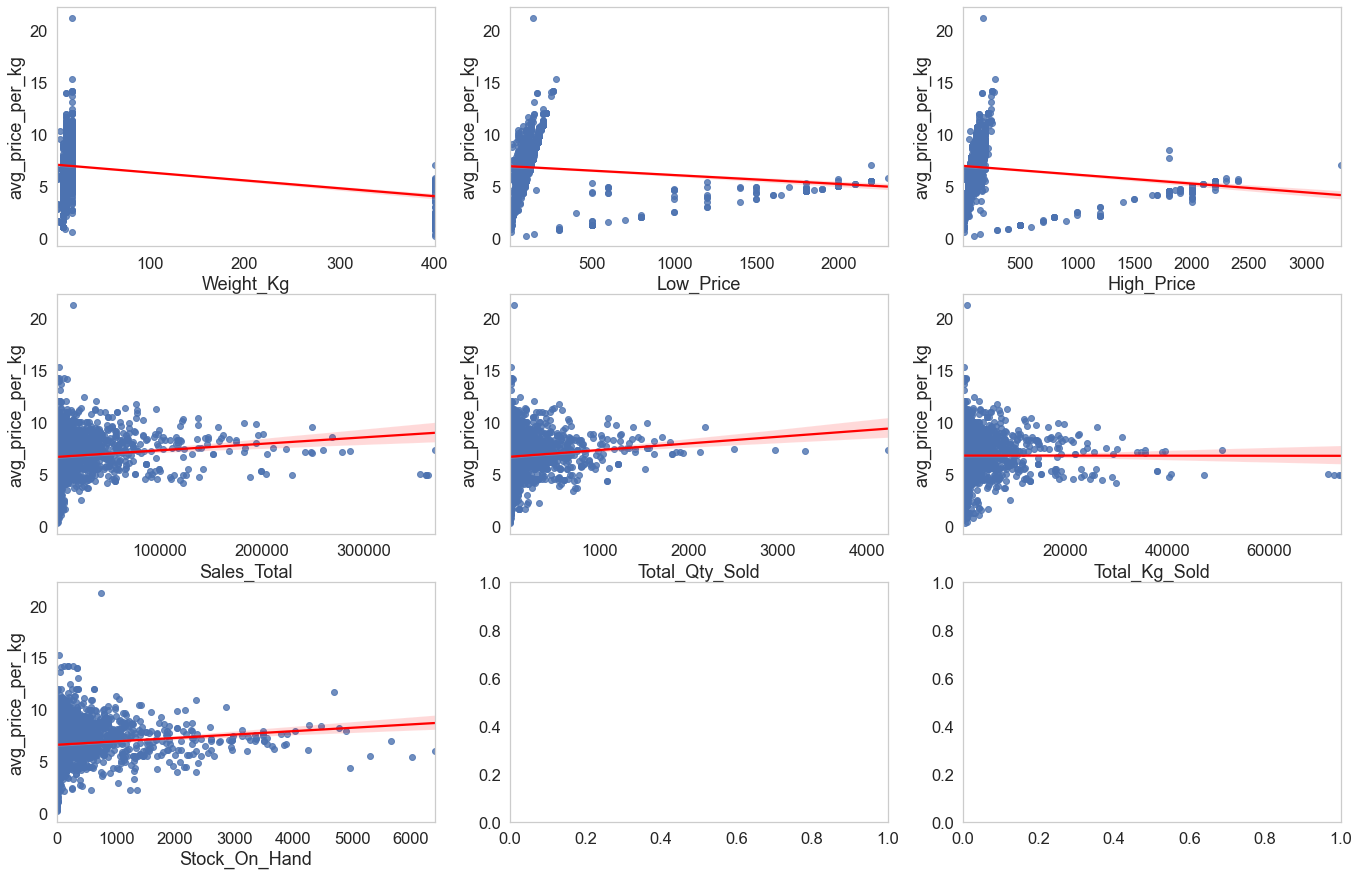

In [133]:
fig, ax = plt.subplots(3,3, figsize=(23,15))
sns.set(font_scale=1.5) 
sns.set_style("whitegrid", {'axes.grid' : False})
sns.regplot(ax=ax[0,1], data=train, x='Low_Price',  y='avg_price_per_kg', line_kws={"color": "red"})
sns.regplot(ax=ax[0,2], data=train, x='High_Price',  y='avg_price_per_kg', line_kws={"color": "red"})
sns.regplot(ax=ax[1,0], data=train, x='Sales_Total',  y='avg_price_per_kg', line_kws={"color": "red"})
sns.regplot(ax=ax[1,1], data=train, x='Total_Qty_Sold',  y='avg_price_per_kg', line_kws={"color": "red"})
sns.regplot(ax=ax[1,2], data=train, x='Total_Kg_Sold',  y='avg_price_per_kg', line_kws={"color": "red"})
sns.regplot(ax=ax[2,0], data=train, x='Stock_On_Hand',  y='avg_price_per_kg', line_kws={"color": "red"})
sns.regplot(ax=ax[0,0], data=train, x='Weight_Kg',  y='avg_price_per_kg', line_kws={"color": "red"})

<AxesSubplot:xlabel='High_Price', ylabel='avg_price_per_kg'>

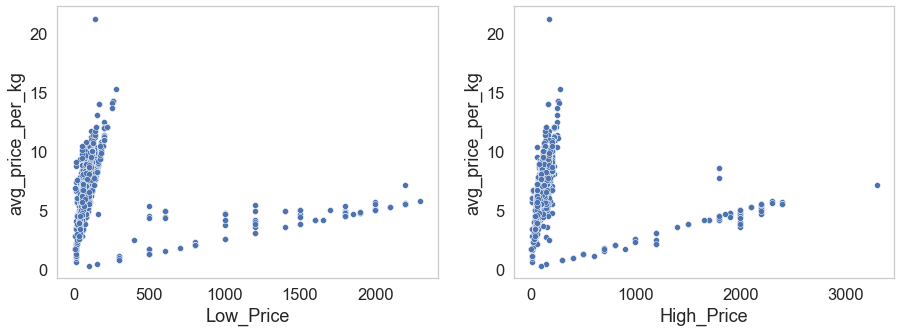

In [140]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.set(font_scale=1.5) 
sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(ax=ax[0], data=train, x='Low_Price',  y='avg_price_per_kg')
sns.scatterplot(ax=ax[1], data=train, x='High_Price',  y='avg_price_per_kg')

Text(0.5, 1.0, 'High Price vs Average price per kg')

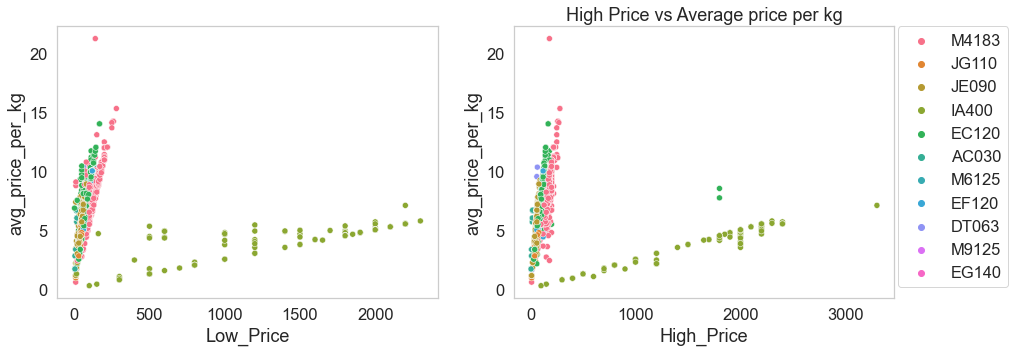

In [151]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.set(font_scale=1.5) 
sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(ax=ax[0], data=train, x='Low_Price',  y='avg_price_per_kg', hue = 'Container', legend = False)
plt.title("Low Price vs Average price per kg")
sns.scatterplot(ax=ax[1], data=train, x='High_Price',  y='avg_price_per_kg', hue = 'Container')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("High Price vs Average price per kg")

It seems that our data has some linearity in Sales_total, Total_Qty_Sold, Total_kg_sold, and stock_on_hand, with no linearity in the other features. However, the linearity of the aforementioned features seem quite poor. A linear model might not be the best to predict values then. We shall however investigate further to decide if this is truly the case

## Multivariate Analysis: Graphical and Non-graphical

We now start to look at different features which impact the avg_price_per_kg and how they relate each other. We do graphhical and non-graphical at once as doing mutlivariate analysis with visuals makes seeing the relationships between variables much easier 

First we wil make a pairplot to plot all the features againt each other to check for colinearity. We will set the 'hue' to be container to see if maybe that is the reason for the multiple trends seen the scatterplots above

C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

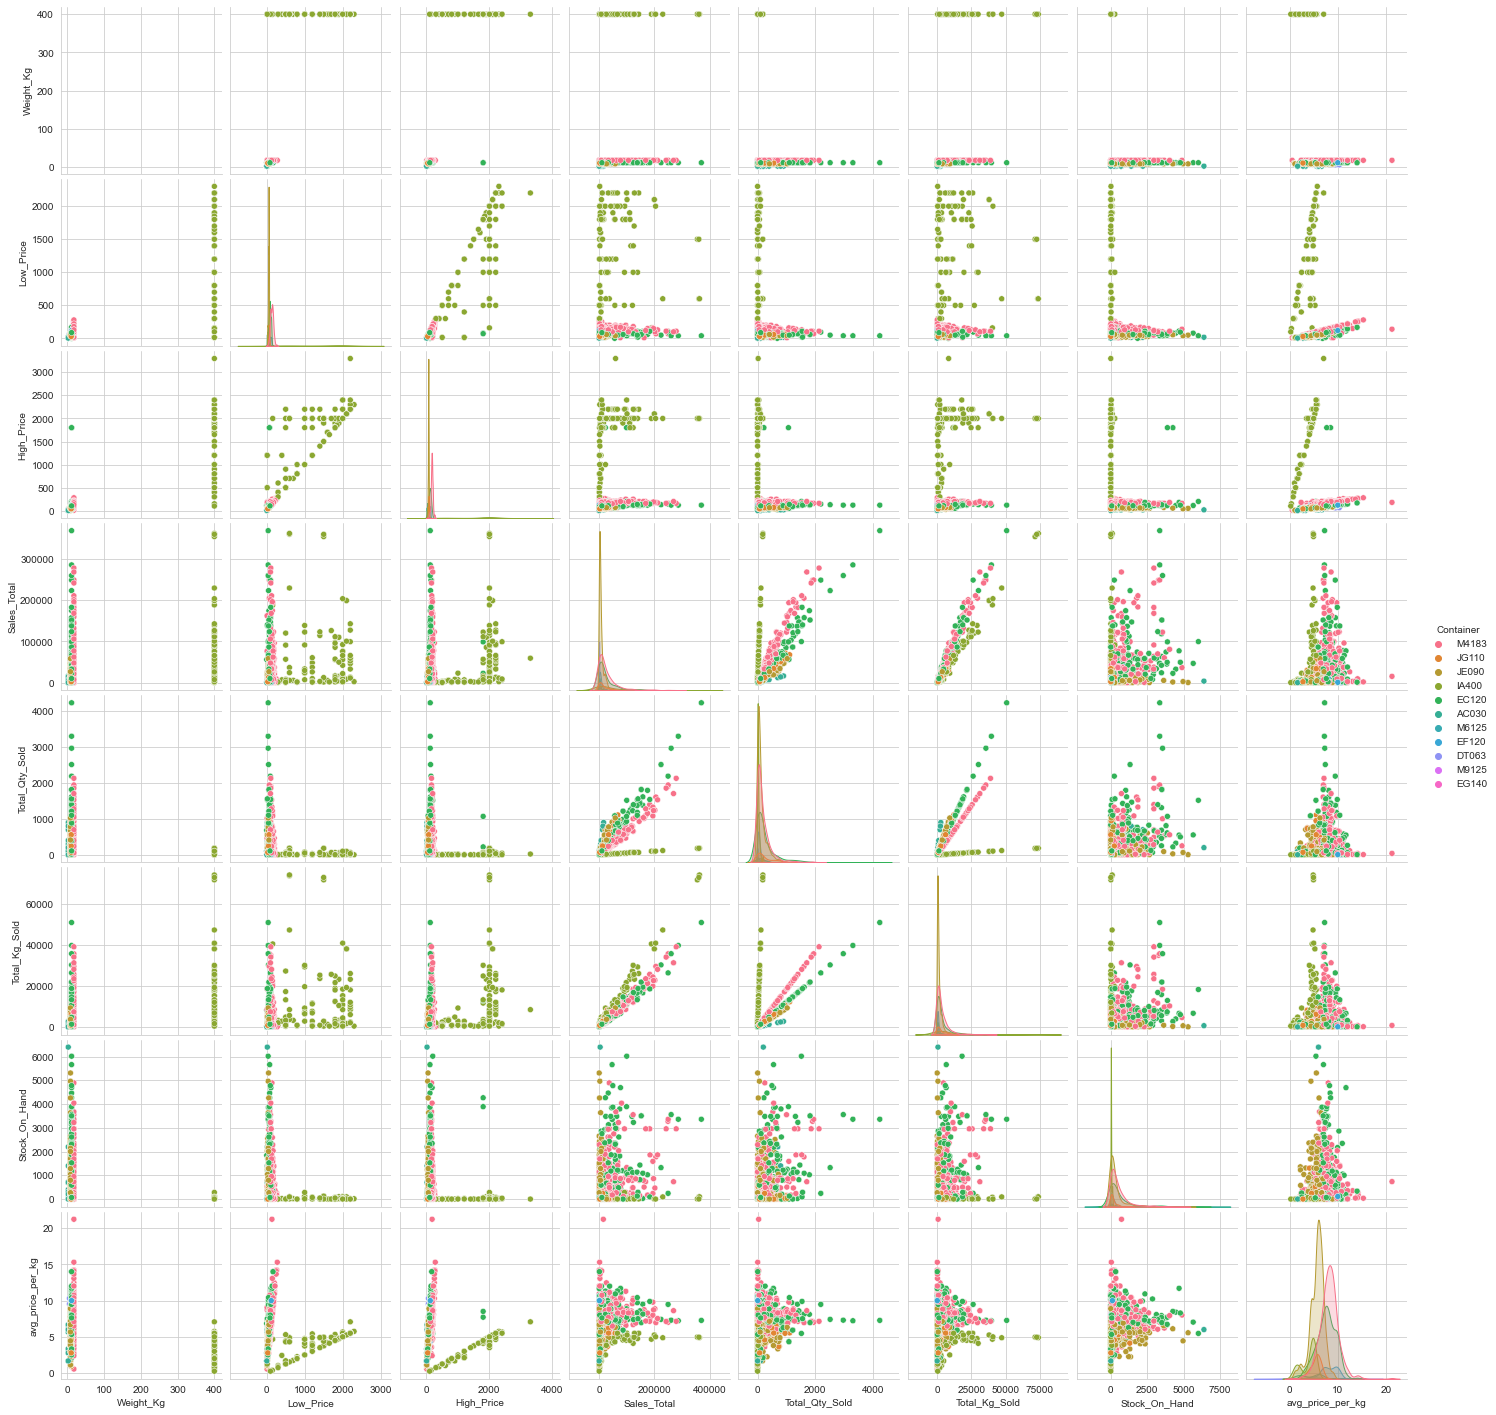

In [57]:
sns.set_style("whitegrid")
sns.pairplot(train, hue='Container')
plt.show()

We can definitely see Weight, Low Price and High Price all have linearity with avg price per kg, depending on the container they are in. <br>

We also see strong colinearity between Total kg sold and total qty sold depending on the container, and similarly for total kg and sales total.

We can plot these each individually to investigate the trends more closely


Text(0.5, 1.0, 'High Price vs Average price per kg')

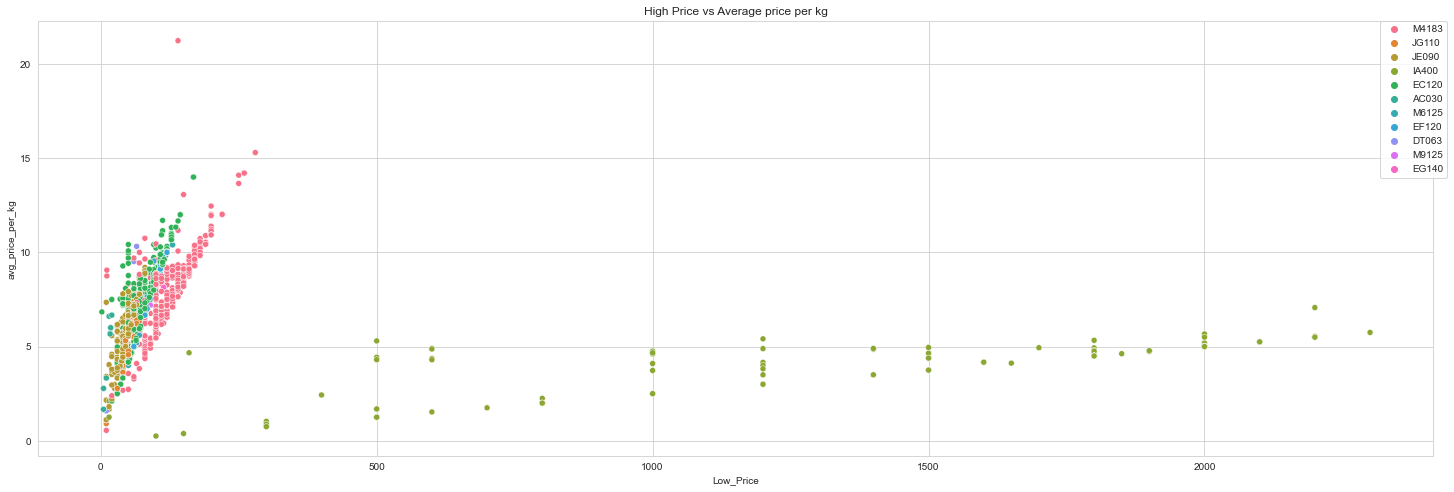

In [58]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(25, 8)

sns.scatterplot(data = train, 
                    x = train['Low_Price'], 
                    y = train['avg_price_per_kg'], 
                    hue = train['Container'],                       
                    legend = True)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("High Price vs Average price per kg")

Text(0.5, 1.0, 'High Price vs Average price per kg')

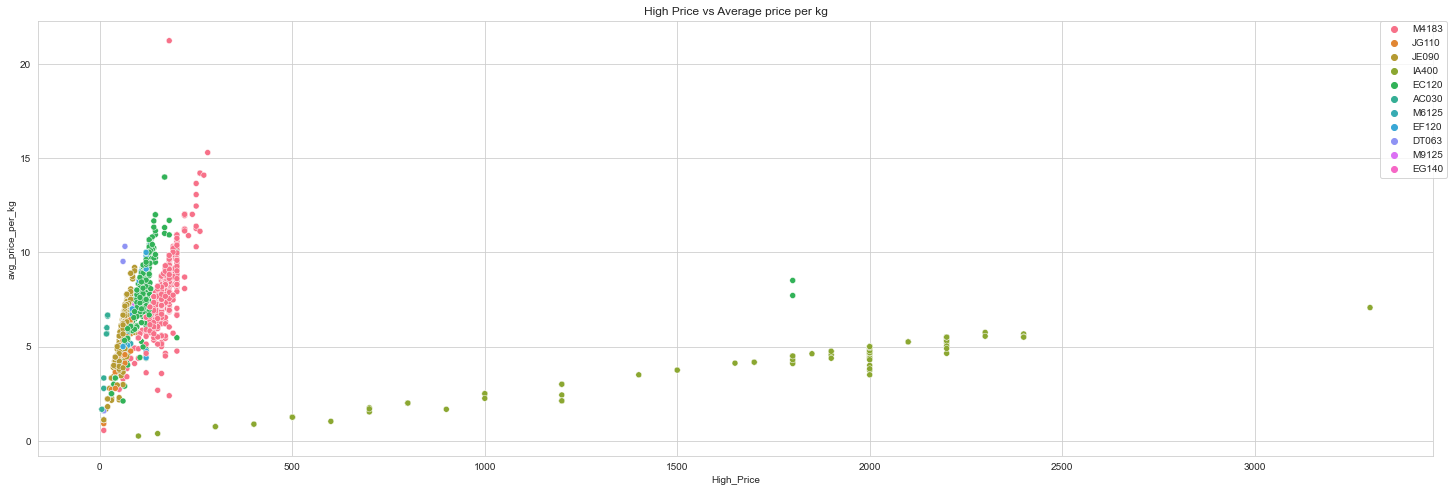

In [59]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(25, 8)

sns.scatterplot(data = train, 
                    x = train['High_Price'], 
                    y = train['avg_price_per_kg'], 
                    hue = train['Container'],                       
                    legend = True)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("High Price vs Average price per kg")

Text(0.5, 1.0, 'High Price vs Average price per kg')

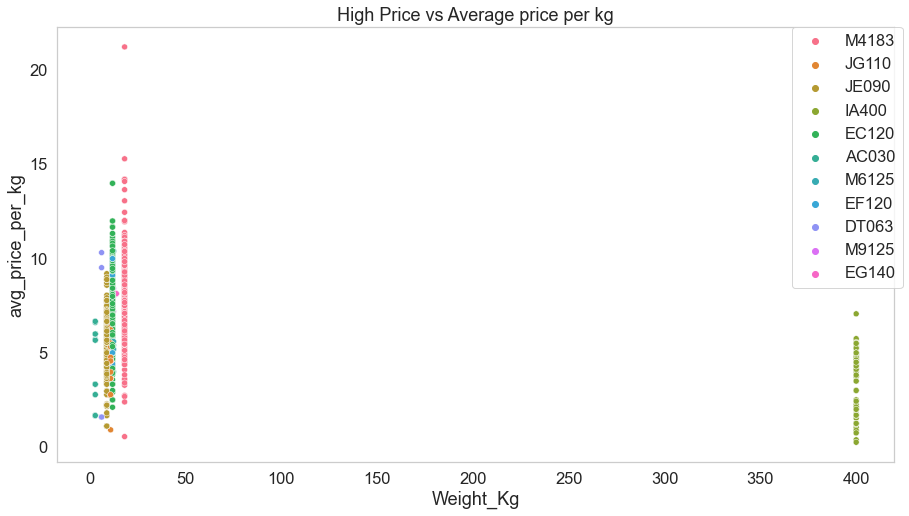

In [145]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(15, 8)

sns.scatterplot(data = train, 
                    x = train['Weight_Kg'], 
                    y = train['avg_price_per_kg'], 
                    hue = train['Container'],                       
                    legend = True)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("High Price vs Average price per kg")

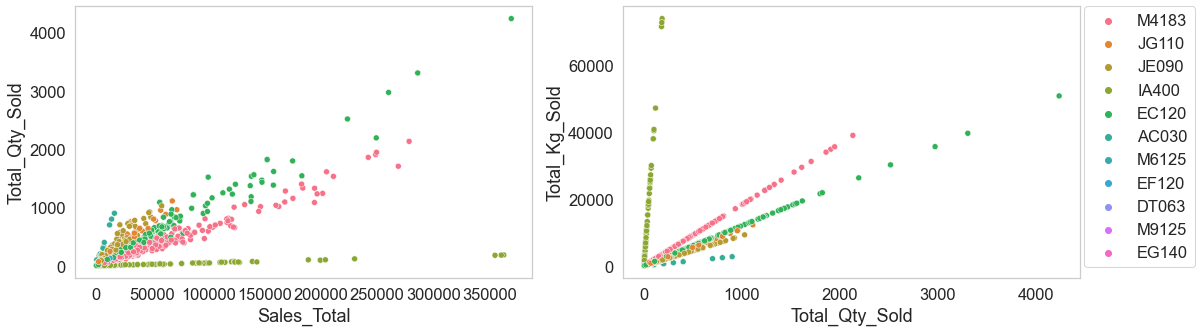

In [209]:
fig, ax = plt.subplots(1,2, figsize=(18,5))
sns.set(font_scale=1.5) 
sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(ax=ax[0], data=train, x='Sales_Total',  y='Total_Qty_Sold', hue = 'Container', legend = False)
sns.scatterplot(ax=ax[1], data=train, x='Total_Qty_Sold',  y='Total_Kg_Sold', hue = 'Container')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

<AxesSubplot:xlabel='Sales_Total', ylabel='Total_Kg_Sold'>

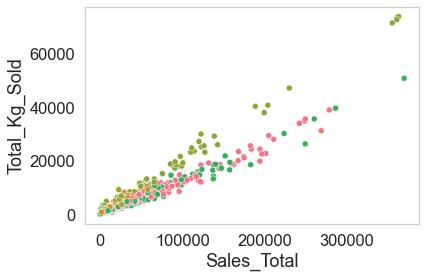

In [208]:
sns.scatterplot(data=train, x='Sales_Total',  y='Total_Kg_Sold', hue = 'Container', legend = False)

In these plot we can clearly see a relationship between high price and low price to avg price per kg depending on the container, but we can also see there are clearly outliers for Containers M4183 and EC120.

It might seem that the large High_Price value for Container IA400 is an outlier, but as it still follows the same trend as the other values for Container IA400, we will not count this as an outlier.

For M4183 there there is one extremely large value for the y-axis, which does not follow the same trend as the rest of the values for the container.

Container EC120 also has 2 values that have the same avg_price_per_kg as most of the values, but a significantly larger High_Price, placing them completely outside the trend of the majority of values.
We can put keep this in mind when doing feature selection later

The apples that are produced the earliest in South Africa are harvested in the Northern Provinces during December. The harvest season then lasts from late January and ending in late May. However, the harvested apples are stored safely for weeks in controlled atmosphere conditions and are sold locally, and to export markets until November, making apples available for most of the year (https://southafrica.co.za/apple-season.html#:~:text=Although%20the%20apple%20picking%20season,for%20most%20of%20the%20year). <br>

Although apples are said to be available throughout the year, it is still worthy to investigate if our apples are dependent on season, so let's split the data into day, month, and season to create additional features that might be useful.

In [32]:
#First we make the date a datetime object
train['Date'] = pd.DatetimeIndex(train['Date'])
test['Date'] = pd.DatetimeIndex(test['Date'])

#Then we can make year and month and day columns for both the test and train dataset.

train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Day'] = pd.DatetimeIndex(train['Date']).day



test['Month'] = pd.DatetimeIndex(test['Date']).month
test['Day'] = pd.DatetimeIndex(test['Date']).month 



#Season column

def season_of_date(date):
    year = str(date.year)
    seasons = {'autumn': pd.date_range(start='01/03/'+year, end='31/05/'+year),
               'winter': pd.date_range(start='01/06/'+year, end='31/08/'+year),
               'spring': pd.date_range(start='01/09/'+year, end='30/11/'+year)}
    if date in seasons['autumn']:
        return 'autumn'
    if date in seasons['winter']:
        return 'winter'
    if date in seasons['spring']:
        return 'spring'
    else:
        return 'summer'

# Assuming df has a date column of type `datetime`
train['Season'] = train.Date.map(season_of_date)
test['Season'] = test.Date.map(season_of_date)

In [33]:
#Then we drop the date column
train.drop(columns = ['Date'], inplace = True)
test.drop(columns = ['Date'], inplace = True)

Text(0.5, 1.0, 'Distribution of Seasons')

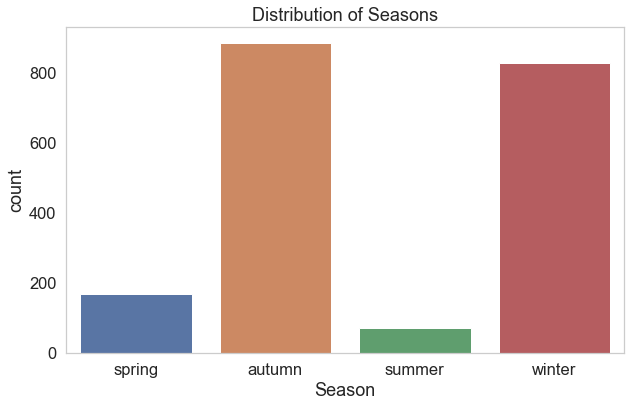

In [155]:
#Let us take a look at how many counts there are for samples per season
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Season', data = train)
plt.title("Distribution of Seasons")

It seems that investigating season was worth it as for the particular apples we are investigating, season does influence the amount of samples available in different seasons and we see that winter and autumn has significantly more samples that summer and spring. Season could be a useful feature later on when doing feature selection.

Now let's investigate if season has an influence on the price 

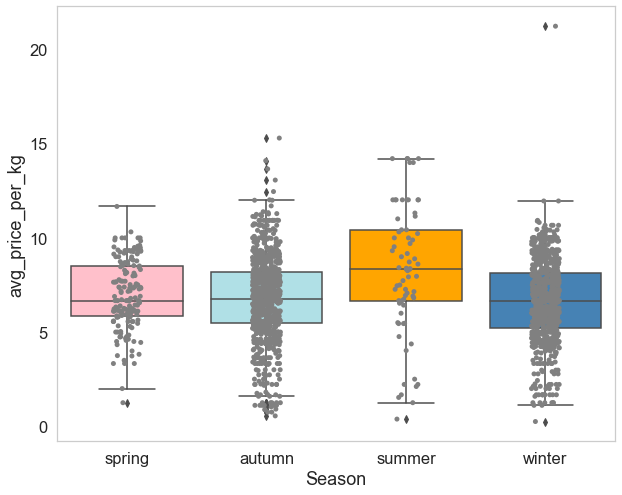

In [168]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(10, 8)

ax = sns.boxplot(x="Season", y="avg_price_per_kg", data=train)
ax = sns.stripplot(x="Season", y="avg_price_per_kg", data=train, color = 'grey')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Select which box you want to change    
mybox = ax.artists[0]
# Change the appearance of that box
mybox.set_facecolor('pink')

# Select which box you want to change    
mybox = ax.artists[1]
# Change the appearance of that box
mybox.set_facecolor('powderblue')

# Select which box you want to change    
mybox = ax.artists[3]
# Change the appearance of that box
mybox.set_facecolor('steelblue')

# Select which box you want to change    
mybox = ax.artists[2]
# Change the appearance of that box
mybox.set_facecolor('orange')

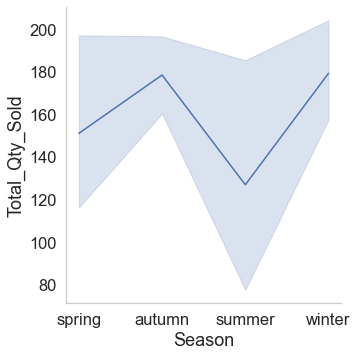

In [202]:

sns.relplot(data=train, x='Season',  y='Total_Qty_Sold', kind = 'line')



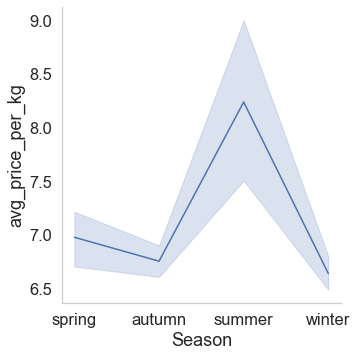

In [205]:
sns.relplot(x='Season', y='avg_price_per_kg', data=train, kind='line')

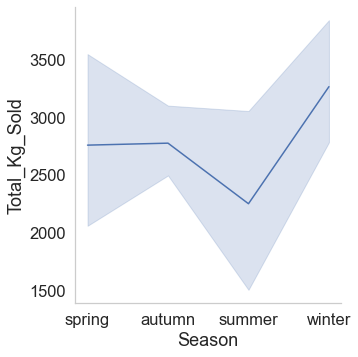

In [203]:
sns.relplot(data=train, x='Season',  y='Total_Kg_Sold',  kind = 'line')


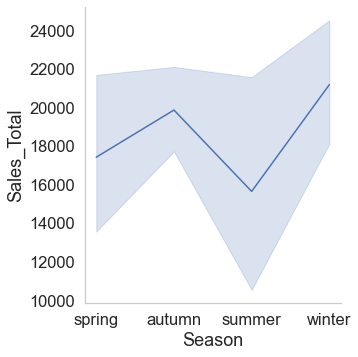

In [204]:
sns.relplot(data=train, x='Season',  y='Sales_Total',  kind = 'line')

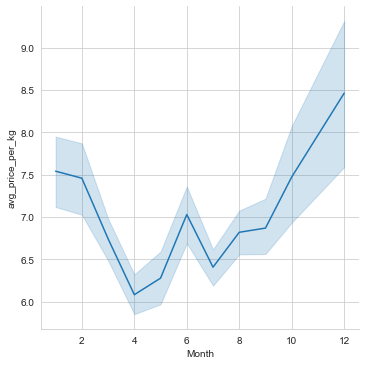

In [194]:
sns.relplot(x='Month', y='avg_price_per_kg', data=train, kind='line')

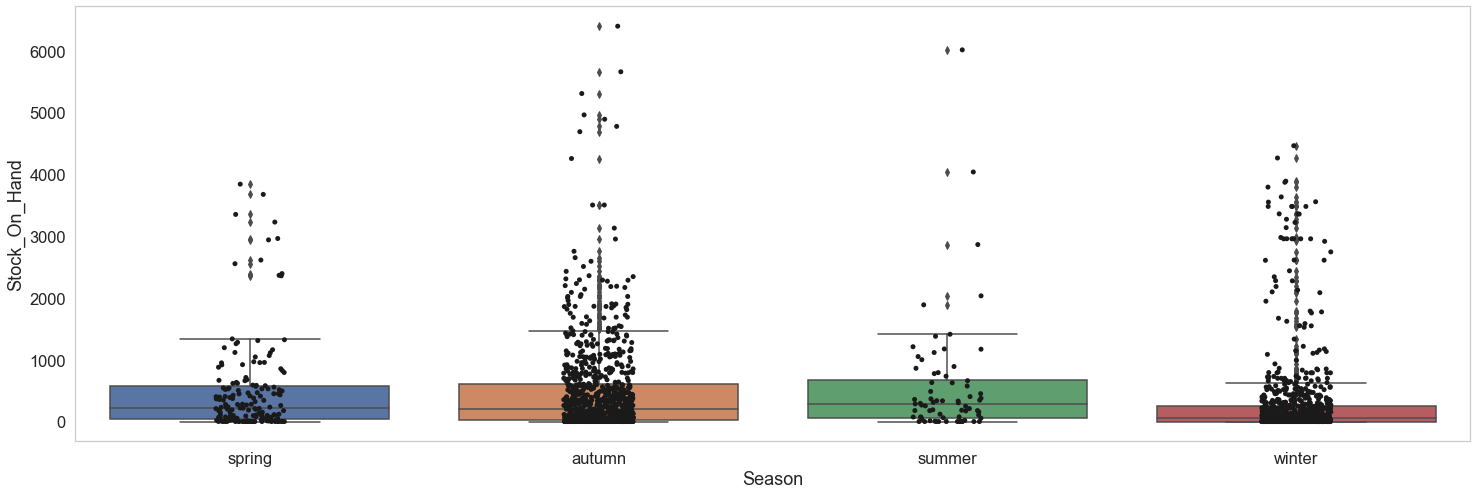

In [206]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(25, 8)

ax = sns.boxplot(x="Season", y="Stock_On_Hand", data=train)
ax = sns.stripplot(x="Season", y="Stock_On_Hand", data=train, color = 'k')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The figure shows a difference in price depending on the season and that when there are fewer apples available, such as in summer, the median price for apples seems to be higher. However, this could just be an artifact from a smaller sample size in summer. We can do a T-test to see if the difference in avg_price_per_kg is significant between summer and the other seasons

In [169]:
#First we make a new df with only season and avg_price_per_kg
seasondf = train[['Season', 'avg_price_per_kg']]
seasondf.groupby('Season').agg({'avg_price_per_kg': ['mean', 'std']}).round(1)

avg_price_per_kg     
                   mean  std
Season                      
autumn              6.8  2.2
spring              7.0  1.8
summer              8.2  3.4
winter              6.6  2.2

We can see that summer has a larger avg price per kg than any of the other seasons, but it also has a much larger standard deviation, indicating no real difference. We will have to do T-tests to find out. An ANOVA to comapre all seasons to all season would actually be more thorough but not necessary.

In [171]:
from scipy.stats import ttest_ind
Summer = seasondf[seasondf['Season']=='summer']
Winter = seasondf[seasondf['Season']=='winter']

ttest_ind(Summer['avg_price_per_kg'], Winter['avg_price_per_kg'])

Ttest_indResult(statistic=5.652815294282714, pvalue=2.1205920043771098e-08)

In [172]:
Summer = seasondf[seasondf['Season']=='summer']
Autumn = seasondf[seasondf['Season']=='autumn']

ttest_ind(Summer['avg_price_per_kg'], Autumn['avg_price_per_kg'])

Ttest_indResult(statistic=5.182324830328583, pvalue=2.673907579029859e-07)

In [173]:
Summer = seasondf[seasondf['Season']=='summer']
Spring = seasondf[seasondf['Season']=='spring']

ttest_ind(Summer['avg_price_per_kg'], Spring['avg_price_per_kg'])

Ttest_indResult(statistic=3.705386936483096, pvalue=0.00026250874219914996)

From the T-tests we can see that there is no real significant difference between summer and either winter or autumn, and is bacause of the large spread of data from winter and autumn. We do however see a p-value of 0.0026 when comparing summer to spring, with the price in summer being higher than in spring. This could improve our predictive accuracy if we included all seasons as features. We will test this later on

<AxesSubplot:xlabel='Month', ylabel='avg_price_per_kg'>

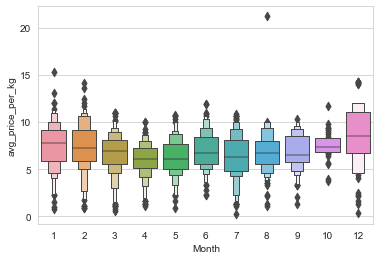

In [44]:
sns.boxenplot(data = train, x = 'Month', y = 'avg_price_per_kg')

<AxesSubplot:xlabel='Day', ylabel='avg_price_per_kg'>

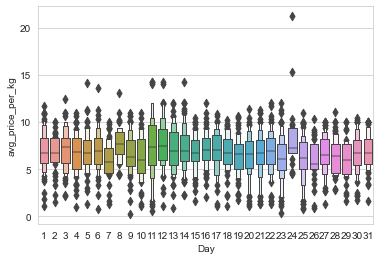

In [45]:
sns.boxenplot(data = train, x = 'Day', y = 'avg_price_per_kg')

Month and year also seems to have an effect on avg_price_per_kg and so we will keep them as features. The day however does not seem to make a difference so we day will probably not be a good predictor of avg_price

Let us now make boxplots for all categorical variables to see how they can affect avg_price_per_kg

No handles with labels found to put in legend.


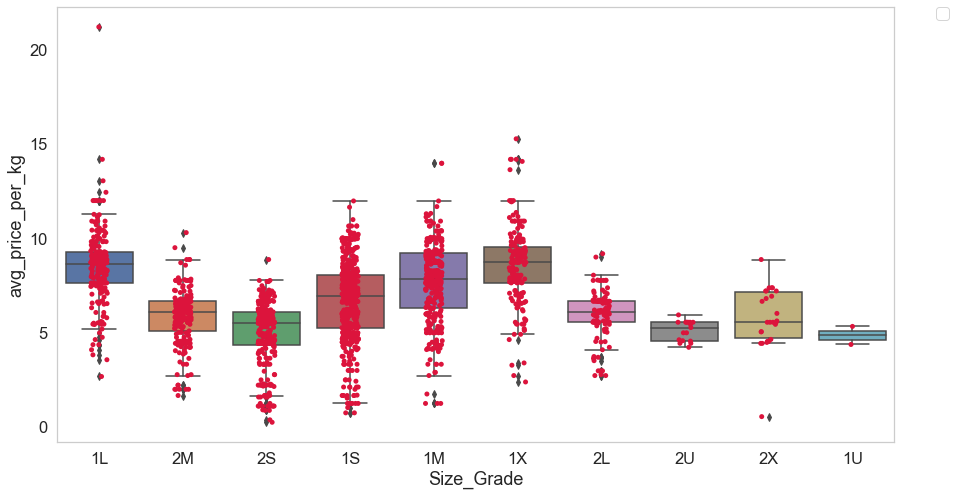

In [177]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(15, 8)

ax = sns.boxplot(x="Size_Grade", y="avg_price_per_kg", data=train)
ax = sns.stripplot(x="Size_Grade", y="avg_price_per_kg", data=train, color = 'crimson')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


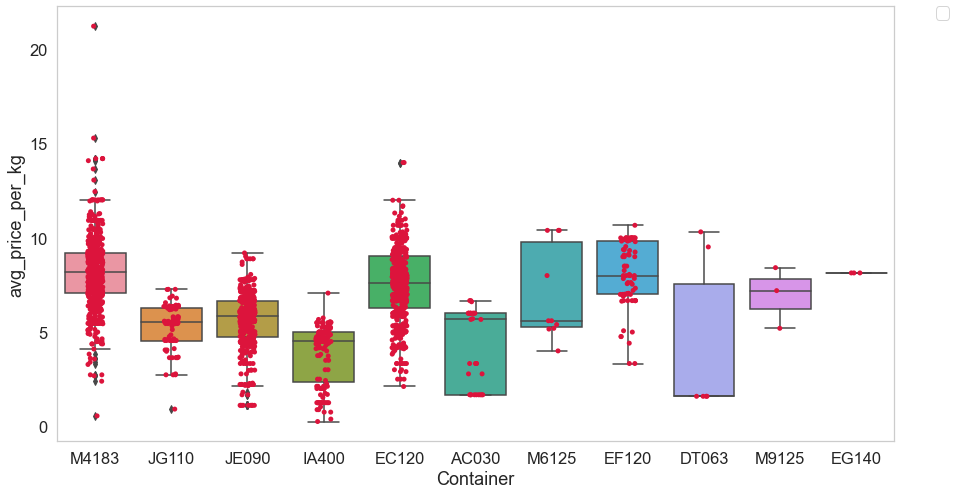

In [178]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(15, 8)

ax = sns.boxplot(x="Container", y="avg_price_per_kg", data=train)
ax = sns.stripplot(x="Container", y="avg_price_per_kg", data=train, color = 'crimson')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


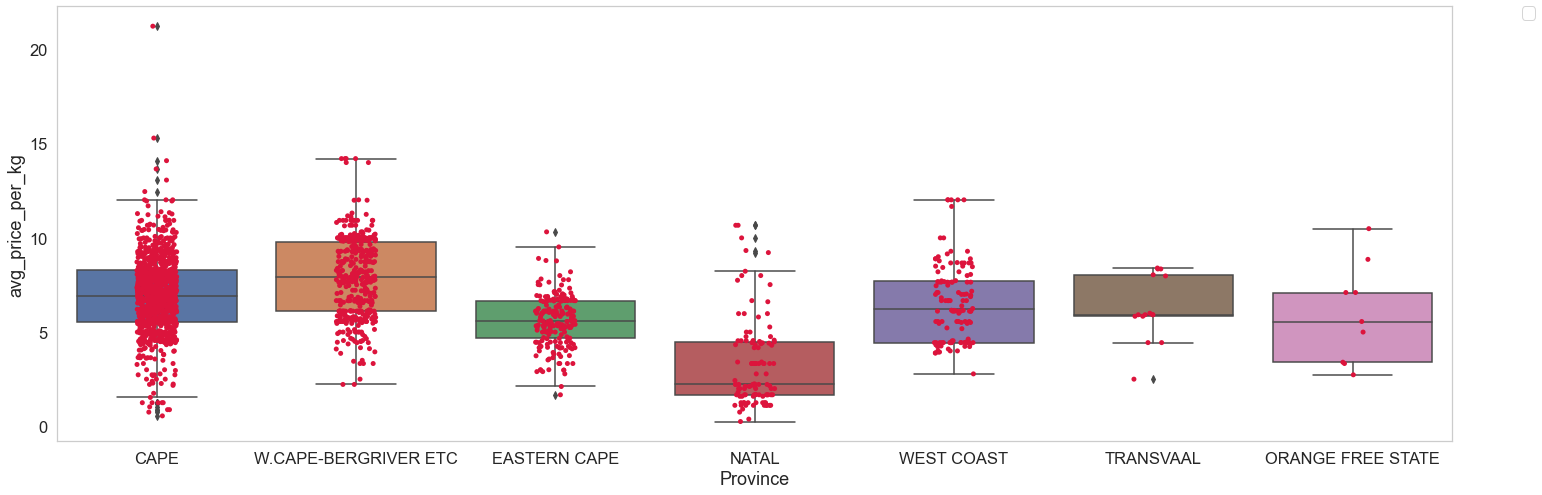

In [180]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(25, 8)

ax = sns.boxplot(x="Province", y="avg_price_per_kg", data=train)
ax = sns.stripplot(x="Province", y="avg_price_per_kg", data=train, color = 'crimson')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In this data set have categorical data for our Season, Province, Size_Grade, and Container columns, we first need to to one hot encode these columns or they won't work when trying to train a model

In [5]:
#We make a dummy df called dtrain 
dtrain = pd.get_dummies(data=train, drop_first=True)

When doing further analyses we need columns that have no white spaces or dashes so we replace thise with underscores

In [216]:
dtrain.columns = [col.replace(" ","_") for col in dtrain.columns]
dtrain.columns = [col.replace(".","_") for col in dtrain.columns]
dtrain.columns = [col.replace("-","_") for col in dtrain.columns]
dtrain.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Month,Day,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_W_CAPE_BERGRIVER_ETC,Province_WEST_COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,4,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,4,16,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,9,28,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


To build a model that predicts avg_price_per_kg we need to to get our df in the right format so that our dependent variable is in the last column to make visualising correlations easier between independent variabes, as well as between dependent and independent variables

In [217]:
#Moving avg_price_per_kg to the last column
column_titles = [col for col in dtrain.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dtrain=dtrain.reindex(columns=column_titles)

We now run a correlation matrix to see the correlation larger than 0.6 between all the different variables

In [218]:
dtrain.corr()[dtrain.corr()>0.6]

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Month,Day,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_W_CAPE_BERGRIVER_ETC,Province_WEST_COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low_Price,0.863182,1.000000,0.938140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High_Price,0.905852,0.938140,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.902518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Total,NaN,NaN,NaN,1.000000,0.771865,0.962338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Qty_Sold,NaN,NaN,NaN,0.771865,1.000000,0.651440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Kg_Sold,NaN,NaN,NaN,0.962338,0.651440,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock_On_Hand,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province_EASTERN_CAPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation Heatmap')

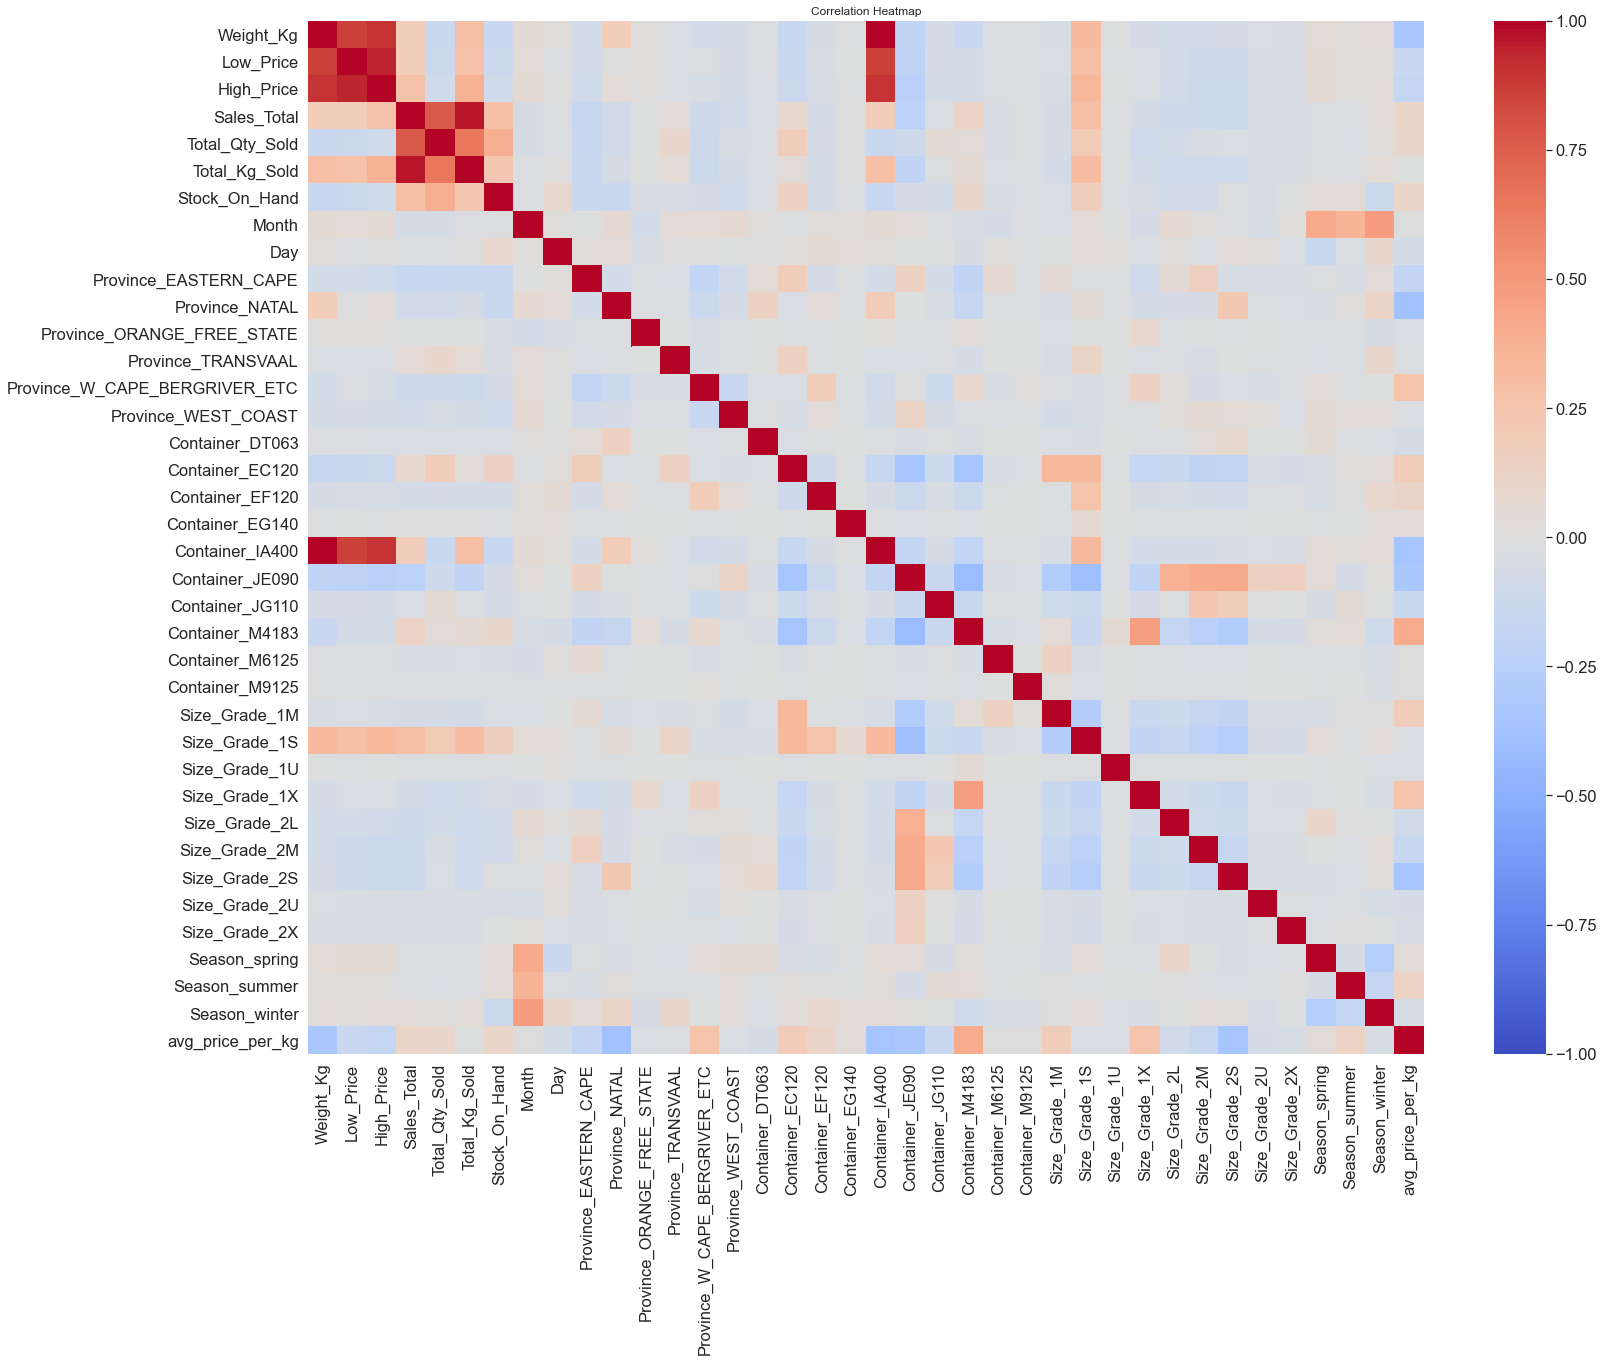

In [219]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(25, 19)

heatmap = sns.heatmap(dtrain.corr(), vmin=-1, vmax=1, annot=False, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

Our correlation matrices show high correlations between weight_kg, low_price and high_price. Container_IA400 and weight also has high correlation but this is not surprising as weight_kg is dived into each container. We also see that Sales_total, total_qty_sold and total_kg_sold are also very highly correlated, but since they all measure amount of sales this is not surprising

We will be using ordinary least squares (OLS) to do some more indepth statistical analysis to estimate the relationship between one or more independent variables and our dependent variable (avg_price_per_kg). <br>

To do an OLS summary we will use the ols module

In [220]:
from statsmodels.formula.api import ols
# Model DataFrame with all of the columns:
dfm = dtrain.copy()

# The dependent variable:
y_name = 'avg_price_per_kg'

# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# The OLS model rquires a formula that takes in all the dependent variables, but the forumala needs to be in a specific format
# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Weight_Kg + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand + Month + Day + Province_EASTERN_CAPE + Province_NATAL + Province_ORANGE_FREE_STATE + Province_TRANSVAAL + Province_W_CAPE_BERGRIVER_ETC + Province_WEST_COAST + Container_DT063 + Container_EC120 + Container_EF120 + Container_EG140 + Container_IA400 + Container_JE090 + Container_JG110 + Container_M4183 + Container_M6125 + Container_M9125 + Size_Grade_1M + Size_Grade_1S + Size_Grade_1U + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Size_Grade_2U + Size_Grade_2X + Season_spring + Season_summer + Season_winter


In [221]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     90.05
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        10:17:13   Log-Likelihood:                -3384.3
No. Observations:                1952   AIC:                             6843.
Df Residuals:                    1915   BIC:                             7049.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

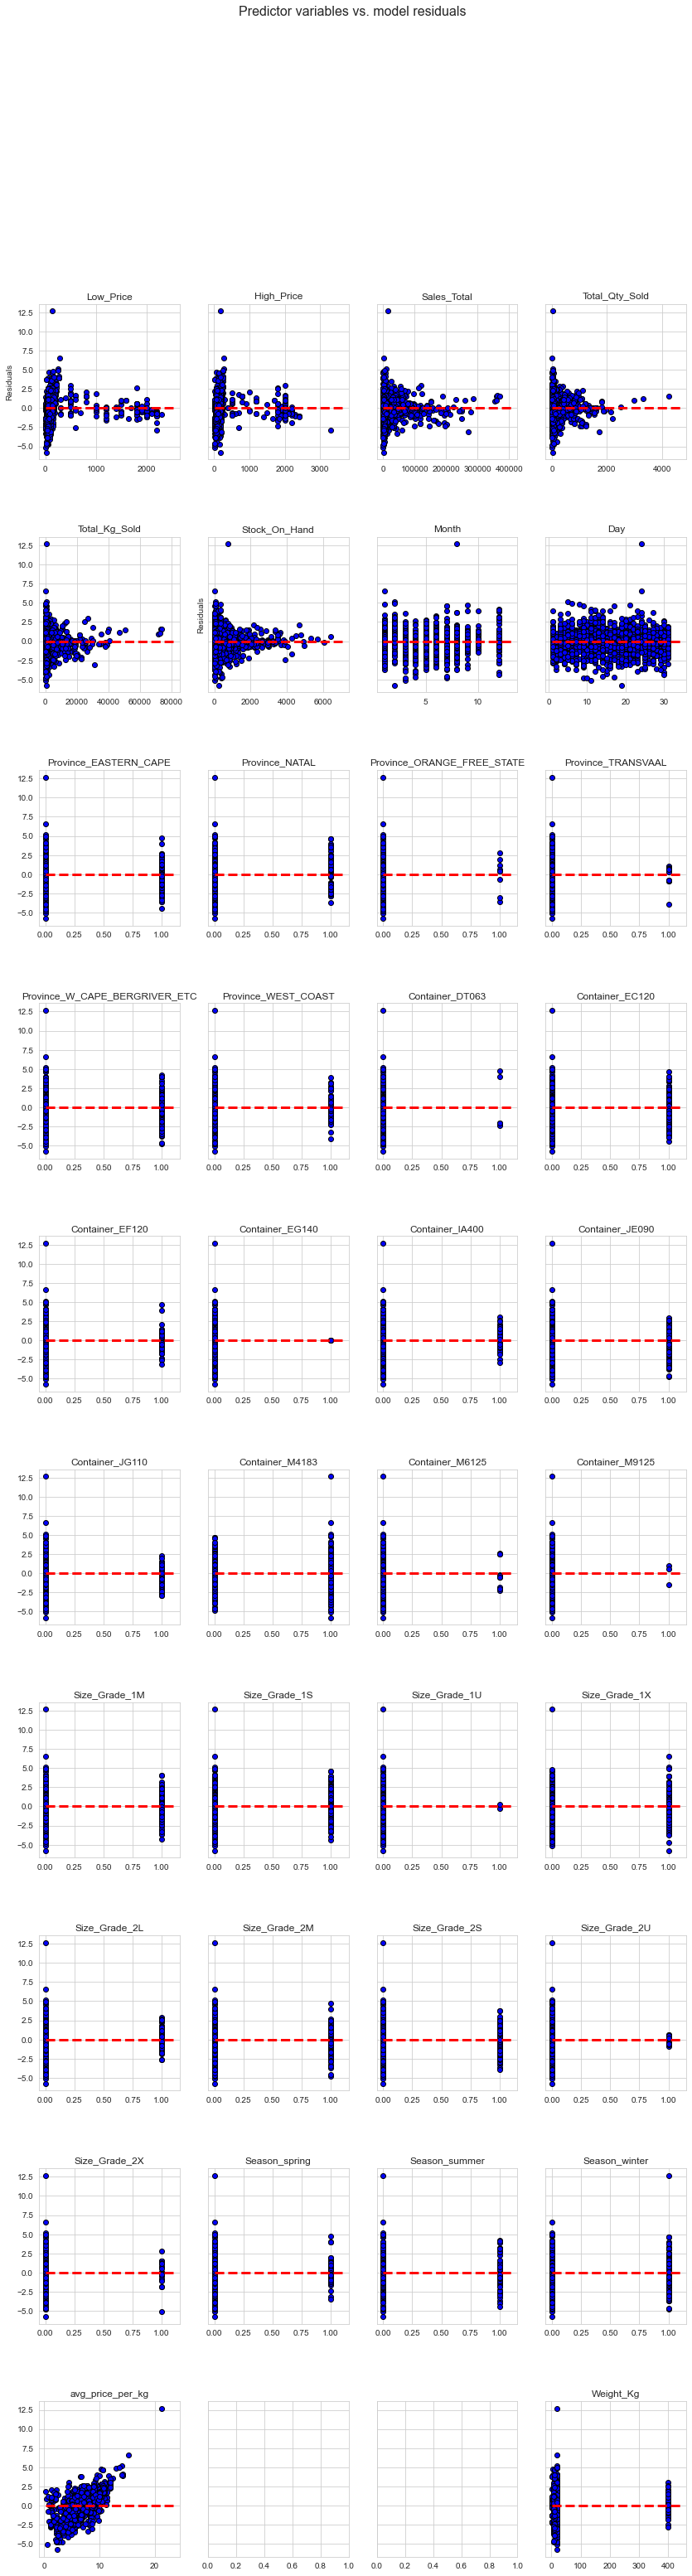

In [94]:
fig, axs = plt.subplots(10,4, figsize=(14,50),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(dtrain.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=dtrain[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(dtrain[column])
    xmax = max(dtrain[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

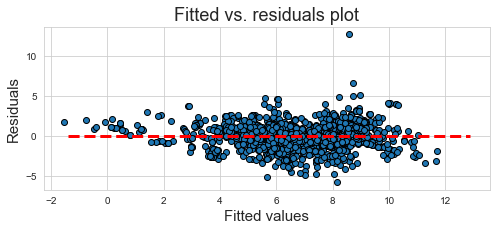

In [95]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

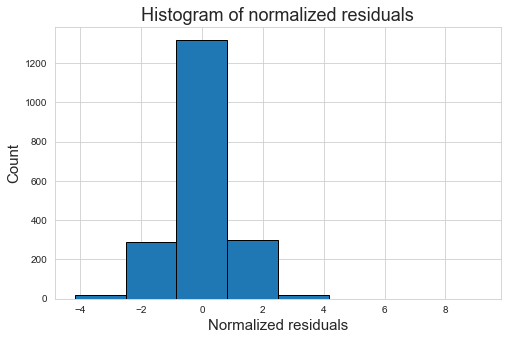

In [96]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

In [98]:
# We once again use the statsmodel library to assist us in producing our qqplot visualisation. 
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

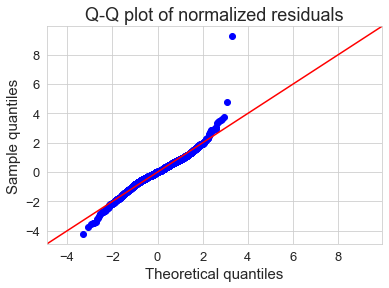

In [99]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [104]:
from statsmodels.stats.outliers_influence import OLSInfluence as inf

In [106]:
inf=influence(fitted)

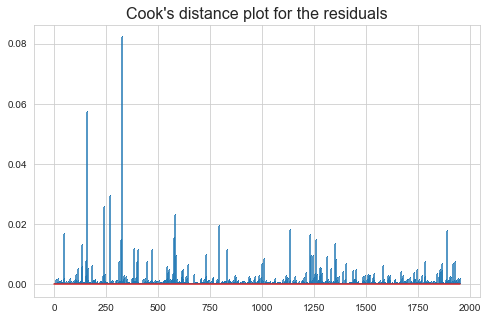

In [107]:
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.grid(True)
plt.show()

We will be using ordinary least squares (OLS) to do some more indepth statistical analysis to estimate the relationship between one or more independent variables and our dependent variable (avg_price_per_kg). <br>

To do an OLS summary we will use the ols module

In [222]:
from statsmodels.formula.api import ols
# Model DataFrame with all of the columns:
dfm = dtrain.copy()

# The dependent variable:
y_name = 'avg_price_per_kg'

# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# The OLS model rquires a formula that takes in all the dependent variables, but the forumala needs to be in a specific format
# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Weight_Kg + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand + Month + Day + Province_EASTERN_CAPE + Province_NATAL + Province_ORANGE_FREE_STATE + Province_TRANSVAAL + Province_W_CAPE_BERGRIVER_ETC + Province_WEST_COAST + Container_DT063 + Container_EC120 + Container_EF120 + Container_EG140 + Container_IA400 + Container_JE090 + Container_JG110 + Container_M4183 + Container_M6125 + Container_M9125 + Size_Grade_1M + Size_Grade_1S + Size_Grade_1U + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Size_Grade_2U + Size_Grade_2X + Season_spring + Season_summer + Season_winter


In [223]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     90.05
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        10:18:07   Log-Likelihood:                -3384.3
No. Observations:                1952   AIC:                             6843.
Df Residuals:                    1915   BIC:                             7049.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

As expected, we see a warning for strong multi collinearity, which is not unexpected given the list of correlated dependent variables described below the correlation matrix

In [224]:
# Calculate correlations between predictor variables and the response variable
corrs = dtrain.corr()['avg_price_per_kg'].sort_values(ascending=False)

In [225]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'avg_price_per_kg']
for col in column_titles:
    p_val = round(pearsonr(dtrain[col], dtrain['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN_CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Container_IA400,-0.355565,0.000000


To build a good predictive model we preferably only want to keep those features with a significant correlation to avg_price_per_kg, which in this case is a p-value below 0.05

In [226]:
# The dependent variable remains the same:  
y_name = 'avg_price_per_kg'
y_data = dtrain[y_name]

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = dtrain[X_names]

It is also important to remove values with high autocorrelation

In [229]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]
corcor = corr.iloc[r[off_diagonal], c[off_diagonal]]
corcor

,High_Price,Low_Price,Weight_Kg,Container_IA400,High_Price,Container_IA400,High_Price,Weight_Kg
Low_Price,0.938140,1.000000,0.863182,0.860219,0.938140,0.860219,0.938140,0.863182
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231


We can see that features  High_Price, Low_price, Weight_Kg and Container_IA400 are all strongly correlated with each other <br>

However, we know that these are all connected to each as the container these are in all affect each other. We will remove the ones that have the lowest correlation to our dependent variable in the sake of being thorough and trying to find the best model

Text(0.5, 1.0, 'Correlation Heatmap')

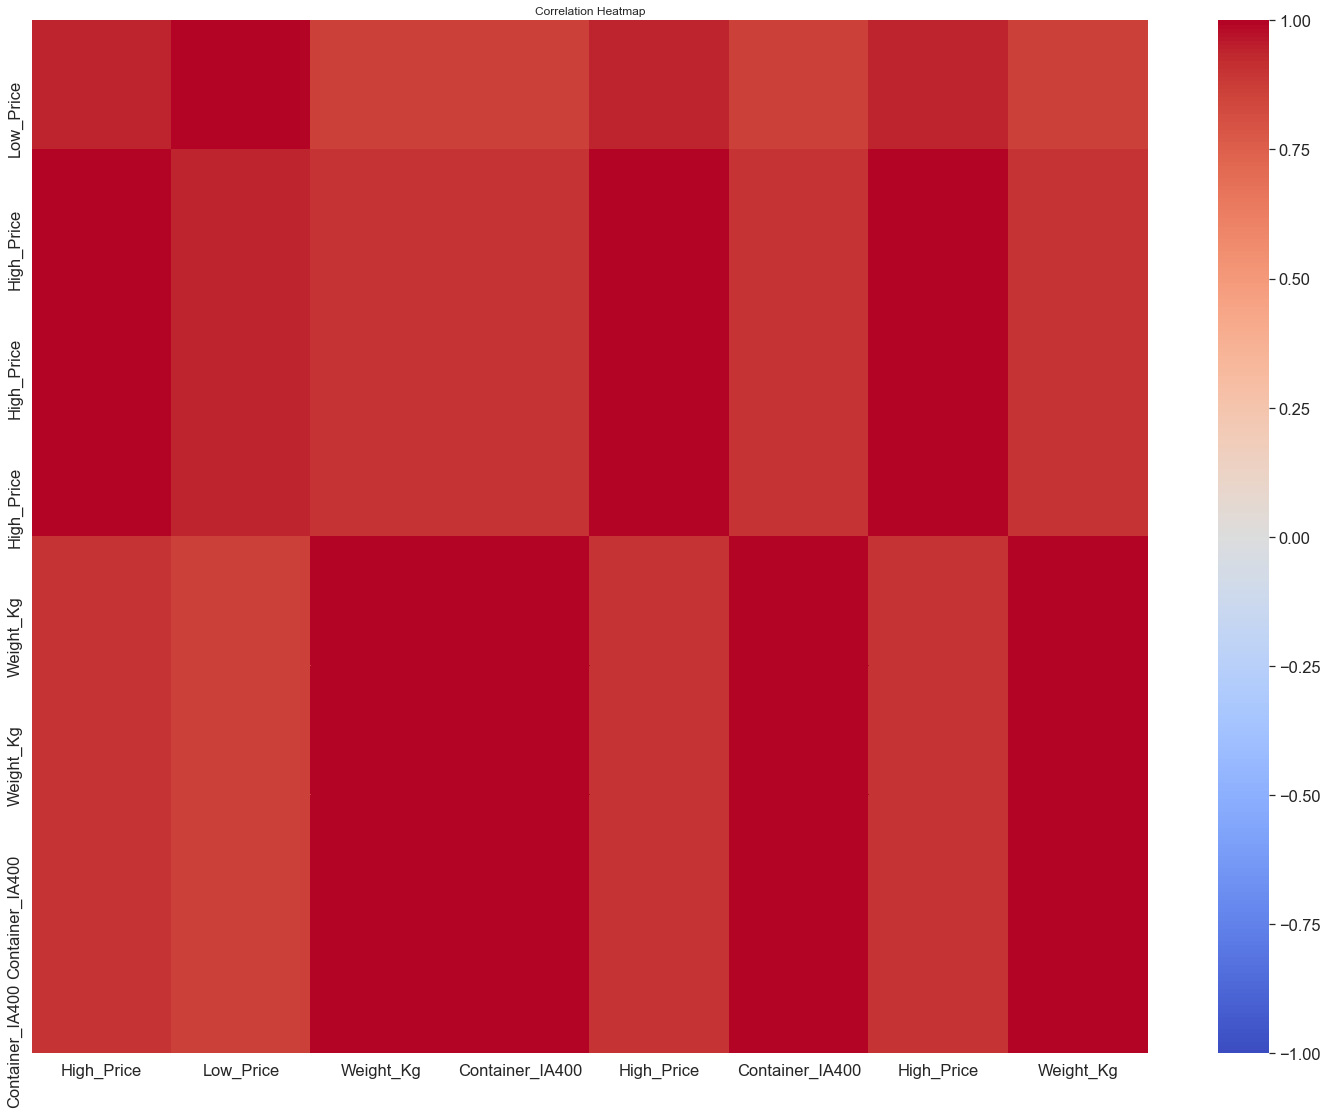

In [228]:
%matplotlib inline

fig = plt.gcf()

fig.set_size_inches(25, 19)

heatmap = sns.heatmap(corcor, vmin=-1, vmax=1, annot=False, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

In [139]:
# Lets take a new subset of our potential independent variables
X_remove = ['Container_IA400', 'Weight_Kg', 'Low_Price']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	avg_price_per_kg ~ Container_M4183 + Province_W_CAPE_BERGRIVER_ETC + Size_Grade_1X + Container_EC120 + Size_Grade_1M + Season_summer + Container_EF120 + Sales_Total + Stock_On_Hand + Total_Qty_Sold + Size_Grade_2X + Season_winter + Container_DT063 + Size_Grade_2U + Day + Size_Grade_2L + Container_JG110 + Size_Grade_2M + High_Price + Province_EASTERN_CAPE + Container_JE090 + Size_Grade_2S + Province_NATAL


In [140]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     91.65
Date:                Sun, 23 May 2021   Prob (F-statistic):          1.08e-288
Time:                        19:02:25   Log-Likelihood:                -3630.1
No. Observations:                1952   AIC:                             7308.
Df Residuals:                    1928   BIC:                             7442.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [231]:
# Separate data into independent (X) and independent (y) variables
X_names = list(dtrain.columns)
X_names.remove(y_name)
X_data = dtrain[X_names]
y_data = dtrain[y_name]

In [232]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [233]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [234]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
36,Season_winter,0.244173
22,Container_M4183,0.210490
20,Container_JE090,0.205667
26,Size_Grade_1S,0.198262
16,Container_EC120,0.176834
13,Province_W_CAPE_BERGRIVER_ETC,0.174600
25,Size_Grade_1M,0.136715
31,Size_Grade_2S,0.132890
30,Size_Grade_2M,0.104727
9,Province_EASTERN_CAPE,0.094396


In [144]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Weight_Kg,Month,Day,Province_EASTERN_CAPE,Province_NATAL,Province_W_CAPE_BERGRIVER_ETC,Province_WEST_COAST,Container_EC120,Container_EF120,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Size_Grade_1M,Size_Grade_1S,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Season_spring,Season_summer,Season_winter
0,0.038539,0.727273,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.020151,0.272727,0.433333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.015113,0.272727,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.038539,0.363636,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.727273,0.900000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [145]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [146]:
selector_1.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [147]:
selector_2.fit(X_normalize)

VarianceThreshold(threshold=0.1)

In [148]:
selector_3.fit(X_normalize)

VarianceThreshold(threshold=0.15)

In [149]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

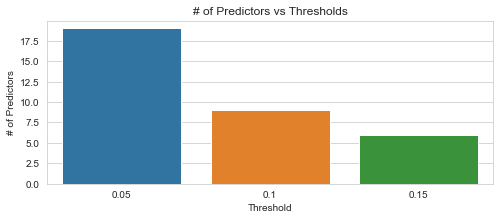

In [150]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

In [151]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	avg_price_per_kg ~ Weight_Kg + Month + Day + Province_EASTERN_CAPE + Province_NATAL + Province_W_CAPE_BERGRIVER_ETC + Province_WEST_COAST + Container_EC120 + Container_EF120 + Container_IA400 + Container_JE090 + Container_JG110 + Container_M4183 + Size_Grade_1M + Size_Grade_1S + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Season_spring + Season_summer + Season_winter


In [152]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=dtrain)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sun, 23 May 2021   Prob (F-statistic):          2.60e-309
Time:                        19:03:12   Log-Likelihood:                -3583.9
No. Observations:                1952   AIC:                             7214.
Df Residuals:                    1929   BIC:                             7342.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [153]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [154]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [155]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

In [156]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [157]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

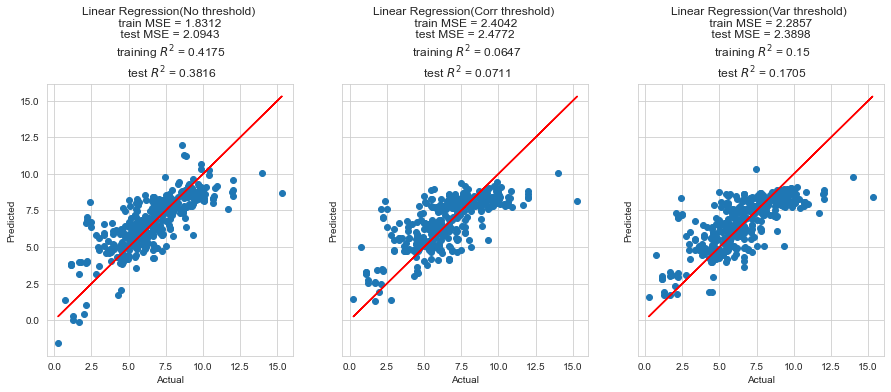

In [158]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

We can see that a linear model does not predict very well and intense feature engineering would have to be done to force the data to adhere to a linear trend. Even by removing badly correlated features and features with low variance, the model performs even worse. This is because the data just does not follow a linear trend, if the data is not separated into the different containers. The avg_price is heavily influenced by the the container and High_Price, Low_Price features. Linear models can not discern between features within features and a decision tree type method would be much more suitable, as this would be able to distinguish between containers.

A method that would very likely be able to predict values accuratley would preferably train a model for each container based on the different independent variables.

For instance, there are 10 different containers for Golden Delicious apples. One could separate the training data into 10 different dataframes, one for each container, and then train a model for each container using Low_Price and High_price for each container, along with a selection of other features. The test data can then also be split up into the respective containers and the necessary preprocessing can be done on the test set, as was done on the training set, to select the features chosen for the training set. Each container test dataframe can then have their respective models used to predict the average price. At the end the predicted values for each dataframe can just be concatenated, ensuring the index is kept. 

We tried this and got good predictions a Kaggle score of 0.64 by only using High_Price and Low_price. It might have improved more of more features were used. We could not find a module that can combine this into one model or a way to first split data into different categories first and train a different linear model on each. Below is an explantation of this method

Split training set into a dataframe for Container and train a model to be used for each container 

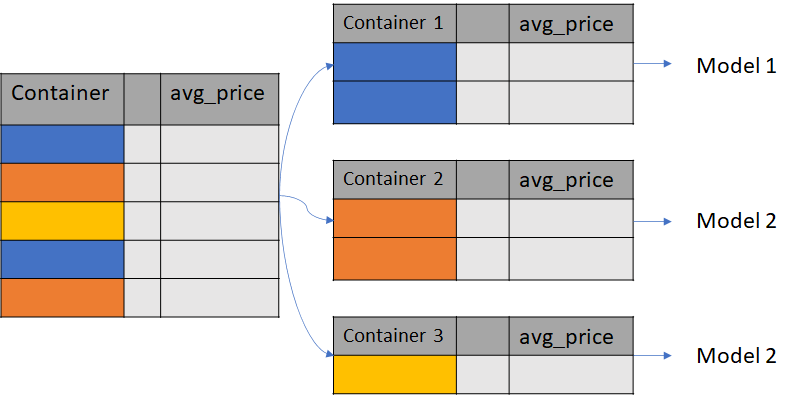

Then split test data into container dataframes and apply the model trained for that container to each dataframe<br>
Then just concatenate the dataframes



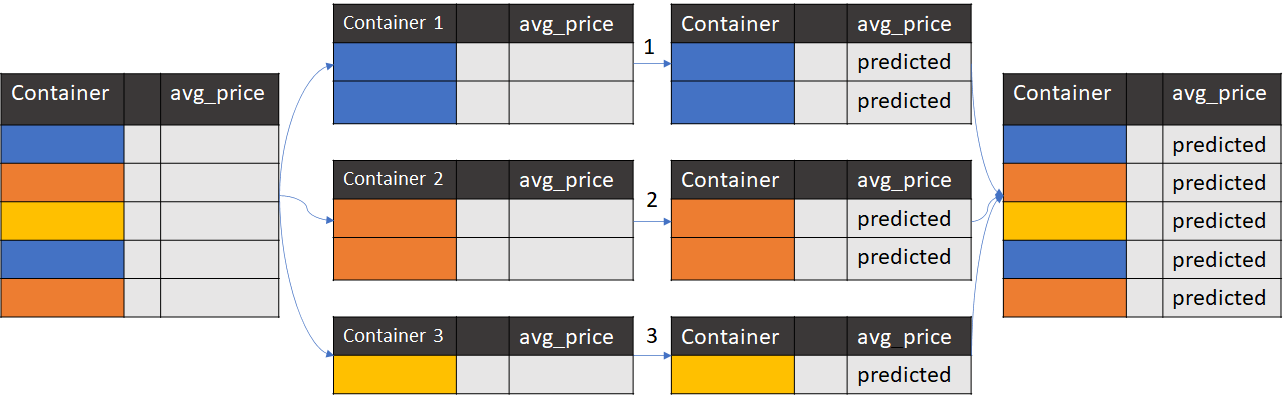

In [34]:
dtrain = pd.get_dummies(data=train, drop_first=True)
test = pd.get_dummies(data=test, drop_first=True)

In [35]:
dtrain

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Month,Day,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,4,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,4,16,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,9,28,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,12.0,96.0,96.0,1920.0,20,240.0,53,8.00,3,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
64291,18.3,130.0,130.0,7280.0,56,1024.8,74,7.10,2,22,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
64297,9.0,50.0,60.0,4540.0,89,801.0,793,5.67,4,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
64304,11.0,30.0,40.0,2140.0,70,770.0,0,2.78,3,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Training and evaluating different models

## Linear Regression

In [36]:
dtrain.columns

Index(['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg', 'Month', 'Day',
       'Province_EASTERN CAPE', 'Province_NATAL', 'Province_ORANGE FREE STATE',
       'Province_TRANSVAAL', 'Province_W.CAPE-BERGRIVER ETC',
       'Province_WEST COAST', 'Container_DT063', 'Container_EC120',
       'Container_EF120', 'Container_EG140', 'Container_IA400',
       'Container_JE090', 'Container_JG110', 'Container_M4183',
       'Container_M6125', 'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S',
       'Size_Grade_1U', 'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M',
       'Size_Grade_2S', 'Size_Grade_2U', 'Size_Grade_2X', 'Season_spring',
       'Season_summer', 'Season_winter'],
      dtype='object')

In [163]:
# Linear Regression
X = dtrain.drop(columns = ['avg_price_per_kg'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

# Set test size to 20 % of training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=6)

lm = LinearRegression()
lm.fit(X_train, y_train)
pred_train_lm= lm.predict(X_train)
print('Train')
print('RMSE: ', np.sqrt(mean_squared_error(y_train,pred_train_lm)))
print('R^2:', r2_score(y_train, pred_train_lm))

print('Test')
pred_test_lm= lm.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_test_lm))) 
print('R^2:', r2_score(y_test, pred_test_lm))

lm_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_lm)),
              'Train R^2':r2_score(y_train, pred_train_lm),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_lm)),
              'Test R^2':r2_score(y_test, pred_test_lm)
             }

Train
RMSE:  1.399435743494914
R^2: 0.6193385703181085
Test
RMSE:  1.2600548838302548
R^2: 0.6610797167842148


## Regularisation
### Ridge Regression

In [162]:
X = dtrain.drop(columns = ['avg_price_per_kg'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

x_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(X)

X_real_scaled = x_scaler.fit_transform(X_real)
# Set test size to 20 % of training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)


ridge = Ridge()
ridge.fit(X_train, y_train)
pred_train_ridge= ridge.predict(X_train)
print('Train')
print('MSE: ', np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print('R^2:', r2_score(y_train, pred_train_ridge))

print('Test')
pred_test_ridge= ridge.predict(X_test)
print('MSE: ', np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print('R^2:', r2_score(y_test, pred_test_ridge))

ridge_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_ridge)),
              'Train R^2':r2_score(y_train, pred_train_ridge),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_ridge)),
              'Test R^2':r2_score(y_test, pred_test_ridge)
             }

Train
MSE:  1.399552201021358
R^2: 0.619275212306464
Test
MSE:  1.2581057603126948
R^2: 0.6621274276076873


### LASSO

In [161]:
#Scaled LASSO
X = dtrain.drop(columns = ['avg_price_per_kg'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

x_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(X)

X_real_scaled = x_scaler.fit_transform(X_real)
# Set test size to 20 % of training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)


lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
pred_train_lasso= lasso.predict(X_train)
print('Train')
print('MSE: ', np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('R^2:', r2_score(y_train, pred_train_lasso))

print('Test')
pred_test_lasso= lasso.predict(X_test)
print('MSE: ', np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R^2:', r2_score(y_test, pred_test_lasso))

lasso_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_lasso)),
              'Train R^2':r2_score(y_train, pred_train_lasso),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_lasso)),
              'Test R^2':r2_score(y_test, pred_test_lasso)
             }

Train
MSE:  1.41016816975653
R^2: 0.6134775130832069
Test
MSE:  1.2443155886391477
R^2: 0.6694937164808423


## Decision Tree

In [160]:
X = dtrain.drop(columns = ['avg_price_per_kg'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=26)

dt = DecisionTreeRegressor(max_depth = 15, random_state = 26)
dt.fit(X_train,y_train)
pred_train_dt= dt.predict(X_train)
print('Train')
print('MSE: ', (mean_squared_error(y_train,pred_train_dt)))
print('R^2:', r2_score(y_train, pred_train_dt))

print('Test')
pred_test_dt= dt.predict(X_test)
print('MSE: ', (mean_squared_error(y_test,pred_test_dt))) 
print('R^2:', r2_score(y_test, pred_test_dt))

dt_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_dt)),
              'Train R^2':r2_score(y_train, pred_train_dt),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_dt)),
              'Test R^2':r2_score(y_test, pred_test_dt)
             }

Train
MSE:  0.002254372694977764
R^2: 0.999545155772254
Test
MSE:  1.2344538288046931
R^2: 0.7918764966221592


## Support Vector Regression

In [159]:
X = dtrain.drop(columns = ['avg_price_per_kg'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=26)

sv = SVR(kernel='rbf', gamma='auto')
sv.fit(X_train,y_train)
pred_train_sv= sv.predict(X_train)
print('Train')
print('MSE: ', (mean_squared_error(y_train,pred_train_sv)))
print('R^2:', r2_score(y_train, pred_train_sv))

print('Test')
pred_test_sv= sv.predict(X_test)
print('MSE: ', (mean_squared_error(y_test,pred_test_sv))) 
print('R^2:', r2_score(y_test, pred_test_sv))

sv_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_sv)),
              'Train R^2':r2_score(y_train, pred_train_sv),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_sv)),
              'Test R^2':r2_score(y_test, pred_test_sv)
             }

Train
MSE:  2.0048656029453484
R^2: 0.5954965437002568
Test
MSE:  5.310454711704104
R^2: 0.10468061798682204


# Ensemble Methods

## Homogenous

### Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor
X = dtrain.drop(columns = ['avg_price_per_kg'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=26)

RF = RandomForestRegressor(n_estimators=500, max_depth=15)
RF.fit(X_train,y_train)
pred_train_RF= RF.predict(X_train)
print('Train')
print('MSE: ', (mean_squared_error(y_train,pred_train_RF)))
print('R^2:', r2_score(y_train, pred_train_RF))

print('Test')
pred_test_RF= RF.predict(X_test)
print('MSE: ', (mean_squared_error(y_test,pred_test_RF))) 
print('R^2:', r2_score(y_test, pred_test_RF))

rf_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_RF)),
              'Train R^2':r2_score(y_train, pred_train_RF),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_RF)),
              'Test R^2':r2_score(y_test, pred_test_RF)
             }

Train
MSE:  0.04138879896547505
R^2: 0.9916493593340948
Test
MSE:  1.0417827372489121
R^2: 0.8243599979395391


### Bagging

In [157]:
X = dtrain.drop(columns = ['avg_price_per_kg', 'Month', 'Day'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=15)
# Instantiate BaggingRegressor model with a decision tree as the base model
bag = BaggingRegressor(base_estimator = d_tree)

bag.fit(X_train, y_train)


pred_train_bag= bag.predict(X_train)
print('Train')
print('RMSE: ', np.sqrt(mean_squared_error(y_train,pred_train_bag)))
print('R^2:', r2_score(y_train, pred_train_bag))

print('Test')
pred_test_bag= bag.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_test_bag))) 
print('R^2:', r2_score(y_test, pred_test_bag))

bag_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_bag)),
              'Train R^2':r2_score(y_train, pred_train_bag),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_bag)),
              'Test R^2':r2_score(y_test, pred_test_bag)
             }

Train
RMSE:  0.2685341898762545
R^2: 0.9856416689533536
Test
RMSE:  0.5595508303265148
R^2: 0.9413592873904504


### AdaBoosting

In [156]:
X = dtrain.drop(columns = ['avg_price_per_kg', 'Month', 'Day'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=15)
# Instantiate BaggingRegressor model with a decision tree as the base model
ada = AdaBoostRegressor(base_estimator = d_tree)

ada.fit(X_train, y_train)


pred_train_ada= ada.predict(X_train)
print('Train')
print('RMSE: ', np.sqrt(mean_squared_error(y_train,pred_train_ada)))
print('R^2:', r2_score(y_train, pred_train_ada))

print('Test')
pred_test_ada= ada.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_test_ada))) 
print('R^2:', r2_score(y_test, pred_test_ada))

ada_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_ada)),
              'Train R^2':r2_score(y_train, pred_train_ada),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_ada)),
              'Test R^2':r2_score(y_test, pred_test_ada)
             }

Train
RMSE:  0.026554836100406053
R^2: 0.9998595919407316
Test
RMSE:  0.4359899188476953
R^2: 0.9643981107323826


### GradientBoosterRegressor

In [155]:
from sklearn.ensemble import GradientBoostingRegressor
X = dtrain.drop(columns = ['avg_price_per_kg', 'Month', 'Day'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)


GB = GradientBoostingRegressor(random_state=26, n_estimators=5000)

GB.fit(X_train, y_train)


pred_train_GB= GB.predict(X_train)
print('Train')
print('RMSE: ', np.sqrt(mean_squared_error(y_train,pred_train_GB)))
print('R^2:', r2_score(y_train, pred_train_GB))

print('Test')
pred_test_GB= GB.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_test_GB))) 
print('R^2:', r2_score(y_test, pred_test_GB))

GB_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_GB)),
              'Train R^2':r2_score(y_train, pred_train_GB),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_GB)),
              'Test R^2':r2_score(y_test, pred_test_GB)
             }

Train
RMSE:  0.009495252290715026
R^2: 0.9999820477948276
Test
RMSE:  0.3612733665866347
R^2: 0.9755548873756618


### XGboosting

## Heterogenous

### Voting

In [154]:
from sklearn.ensemble import VotingRegressor

models = [("GB", GB),("ada", ada)]

model_weightings = np.array([0.7, 0.3])


X = dtrain.drop(columns = ['avg_price_per_kg', 'Month', 'Day'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)


vot = VotingRegressor(estimators = models, weights = model_weightings)

vot.fit(X_train, y_train)


pred_train_vot= vot.predict(X_train)
print('Train')
print('RMSE: ', np.sqrt(mean_squared_error(y_train,pred_train_vot)))
print('R^2:', r2_score(y_train, pred_train_vot))

print('Test')
pred_test_vot= vot.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_test_vot))) 
print('R^2:', r2_score(y_test, pred_test_vot))

vot_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_vot)),
              'Train R^2':r2_score(y_train, pred_train_vot),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_vot)),
              'Test R^2':r2_score(y_test, pred_test_vot)
             }

Train
RMSE:  0.012514521147642616
R^2: 0.9999688158967939
Test
RMSE:  0.3641684623286981
R^2: 0.9751615314706249


### Stacking

In [124]:
models = [("GB", GB),("ada", ada)]

model_weightings = np.array([0.7, 0.3])
meta_learner_reg = RandomForestRegressor(n_estimators=10, max_depth=15)

X = dtrain.drop(columns = ['avg_price_per_kg', 'Month', 'Day'],axis=1)
y = dtrain['avg_price_per_kg']
X_real = test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

sta = StackingRegressor(estimators = models, final_estimator = meta_learner_reg)

sta.fit(X_train, y_train)


pred_train_sta= sta.predict(X_train)
print('Train')
print('RMSE: ', np.sqrt(mean_squared_error(y_train,pred_train_sta)))
print('R^2:', r2_score(y_train, pred_train_sta))

print('Test')
pred_test_sta= sta.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_test_sta))) 
print('R^2:', r2_score(y_test, pred_test_sta))

sta_eval = {'Train RMSE': np.sqrt(mean_squared_error(y_train,pred_train_sta)),
              'Train R^2':r2_score(y_train, pred_train_sta),
              'Test RMSE': np.sqrt(mean_squared_error(y_test,pred_test_sta)),
              'Test R^2':r2_score(y_test, pred_test_sta)}

Train
RMSE:  0.243060148879559
R^2: 0.9882366151605803
Test
RMSE:  0.47230138321616366
R^2: 0.9582209476244492


In [85]:
X_real.drop(columns = ['Index', 'Month', 'Day'], inplace = True)

pred_vals = vot.predict(X_real)
y_preds = pd.DataFrame({'avg_price_per_kg': pred_vals})
y_preds.head()

,avg_price_per_kg
0,10.871760
1,11.779075
2,10.009950
3,8.716582
4,8.152689


In [86]:
#############################
#############################
#############################
#############################
#############################


submission = pd.DataFrame({'avg_price_per_kg': pred_vals})
submission.index = submission.index + 1
submission.reset_index(drop = False, inplace = True)
submission.columns = ['Index', 'avg_price_per_kg']
submission.to_csv("voting.csv", index=False)


#############################
#############################
#############################
#############################

In [151]:

print(vot_eval)

{'Train RMSE': 0.012299219170124939, 'Train R^2': 0.9759908156211317, 'Test RMSE': 0.3580375925778594}


In [164]:
pd.DataFrame({'sta_eval':sta_eval,
              'vot_eval':vot_eval,
              'GB_eval':pd.Series(GB_eval),
              'ada_eval':pd.Series(ada_eval),
              'bag_eval':pd.Series(bag_eval),
              'rf_eval':pd.Series(rf_eval),
              'sv_eval':pd.Series(sv_eval),
              'dt_eval':pd.Series(dt_eval),
              'lasso_eval':pd.Series(lasso_eval),
              'ridge_eval':pd.Series(ridge_eval),
              'lm_eval':pd.Series(lm_eval)
             }).T

,Train RMSE,Train R^2,Test RMSE,Test R^2
sta_eval,0.243060,0.988237,0.472301,0.958221
vot_eval,0.012515,0.999969,0.364168,0.975162
GB_eval,0.009495,0.999982,0.361273,0.975555
ada_eval,0.026555,0.999860,0.435990,0.964398
bag_eval,0.268534,0.985642,0.559551,0.941359
rf_eval,0.203442,0.991649,1.020678,0.824360
sv_eval,1.415933,0.595497,2.304442,0.104681
dt_eval,0.047480,0.999545,1.111060,0.791876
lasso_eval,1.410168,0.613478,1.244316,0.669494
ridge_eval,1.399552,0.619275,1.258106,0.662127
